In [59]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set_theme(style="whitegrid", palette="muted")
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from pylab import rcParams
import statsmodels.api as sm

In [60]:
tourism_data = pd.read_csv('tourism_data.csv')

In [61]:
tourism_data.head()

,Y20,Y152
0,40671,103880
1,53075,126331
2,76141,139227
3,118008,196868
4,162363,232397


In [62]:
tourism_data['Year'] = pd.date_range(start='1980-01-01', periods=len(tourism_data), freq='A').year

In [63]:
tourism_data

,Y20,Y152,Year
0,40671,103880,1980
1,53075,126331,1981
2,76141,139227,1982
3,118008,196868,1983
4,162363,232397,1984
5,215060,290503,1985
6,262354,387609,1986
7,293761,482969,1987
8,307367,589066,1988
9,350017,769908,1989


In [64]:
tourism_data["Y20"].describe()

count    4.300000e+01
mean     1.457180e+06
std      1.104090e+06
min      4.067100e+04
25%      5.718415e+05
50%      1.225369e+06
75%      2.056900e+06
max      4.007700e+06
Name: Y20, dtype: float64

In [65]:
tourism_data['Y152'].describe()

count    4.300000e+01
mean     1.643921e+06
std      1.014376e+06
min      1.038800e+05
25%      8.738495e+05
50%      1.516260e+06
75%      2.643700e+06
max      3.379535e+06
Name: Y152, dtype: float64

In [66]:
tourism_data.isna().sum()

Y20     0
Y152    0
Year    0
dtype: int64

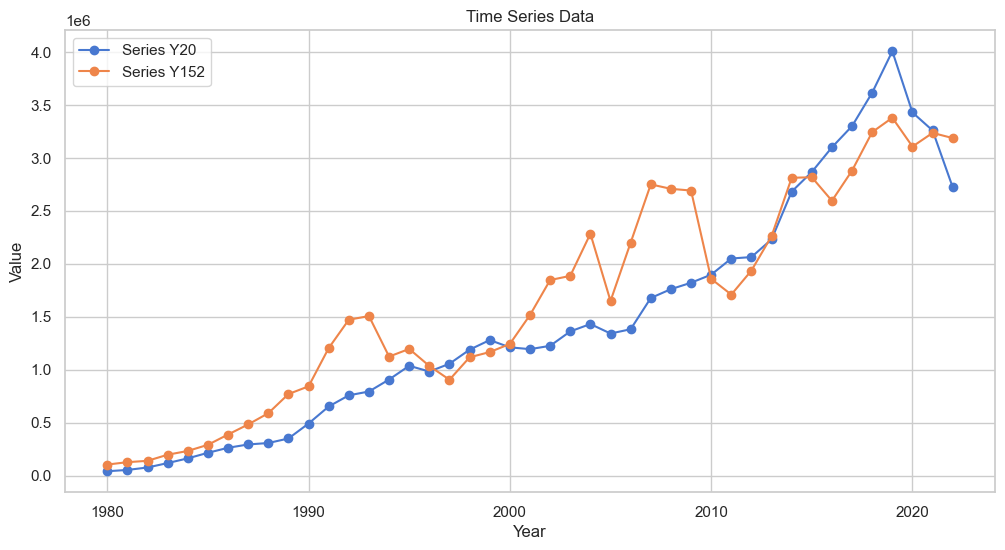

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(tourism_data['Year'], tourism_data['Y20'], label='Series Y20',marker='o')
plt.plot(tourism_data['Year'], tourism_data['Y152'], label='Series Y152',marker='o')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.title('Time Series Data')
plt.grid(True)
plt.show()

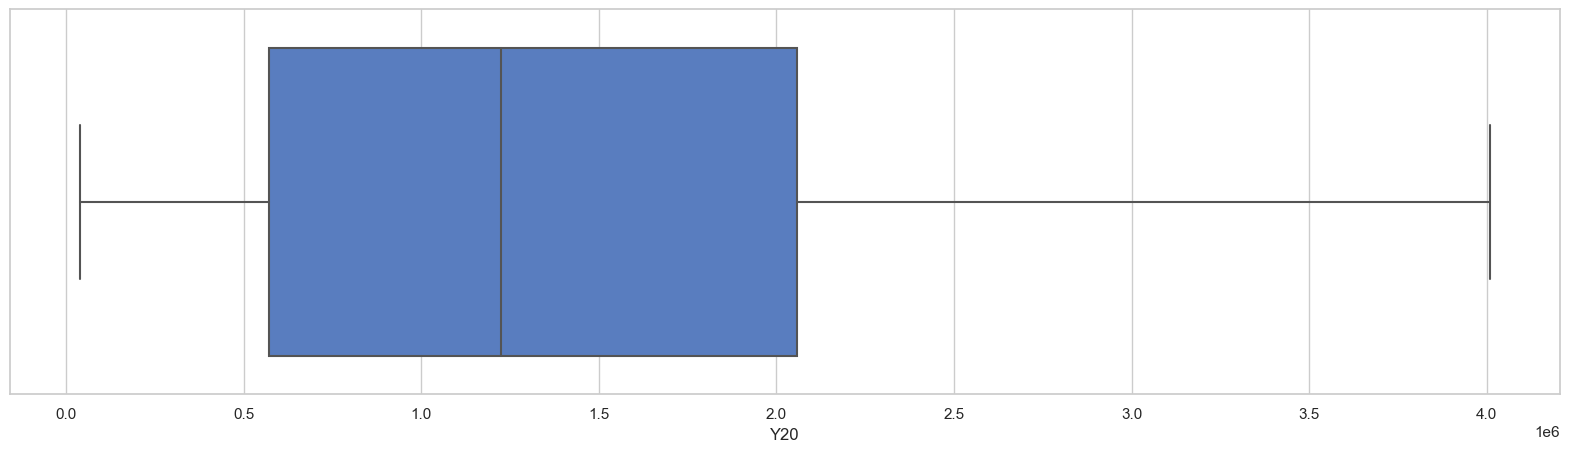

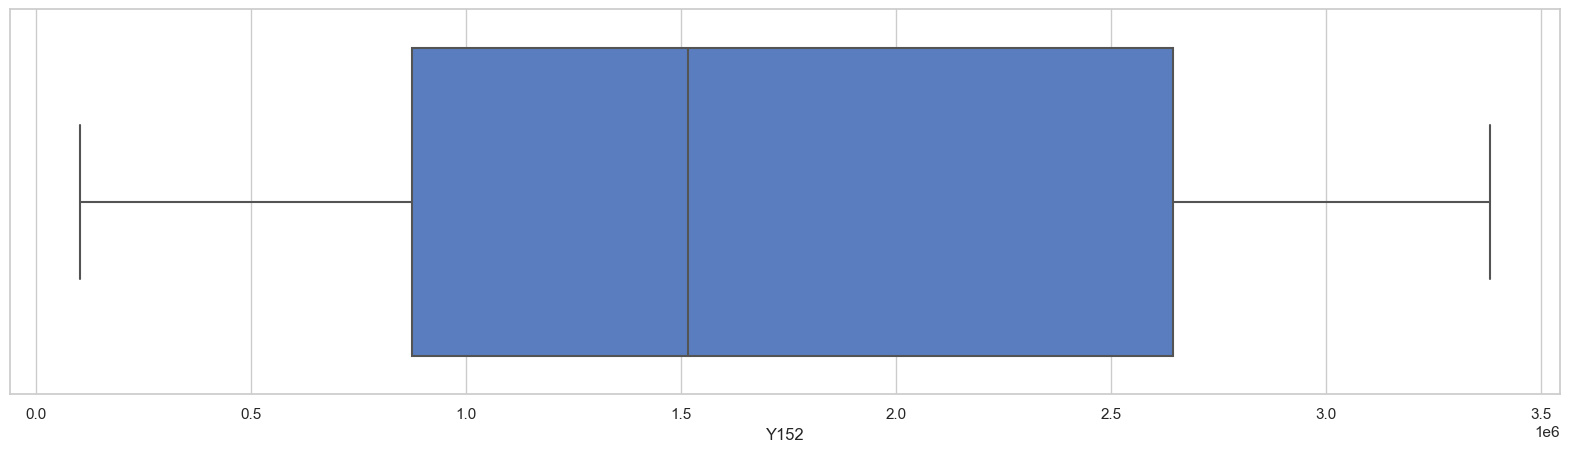

In [7]:
fig = plt.subplots(figsize=(20, 5))
ax = sns.boxplot(x=tourism_data['Y20'],whis=1.5)

fig = plt.subplots(figsize=(20, 5))
ax = sns.boxplot(x=tourism_data['Y152'],whis=1.5)

In [52]:
Y152_series = pd.DataFrame({'Year': tourism_data['Year'], 'Value': tourism_data['Y152']})
Y152_series['Year'] = pd.to_datetime(Y152_series['Year'], format='%Y')
Y152_series.set_index('Year', inplace=True)

Y20_series = pd.DataFrame({'Year': tourism_data['Year'], 'Value': tourism_data['Y20']})
Y20_series['Year'] = pd.to_datetime(Y20_series['Year'], format='%Y')
Y20_series.set_index('Year', inplace=True)

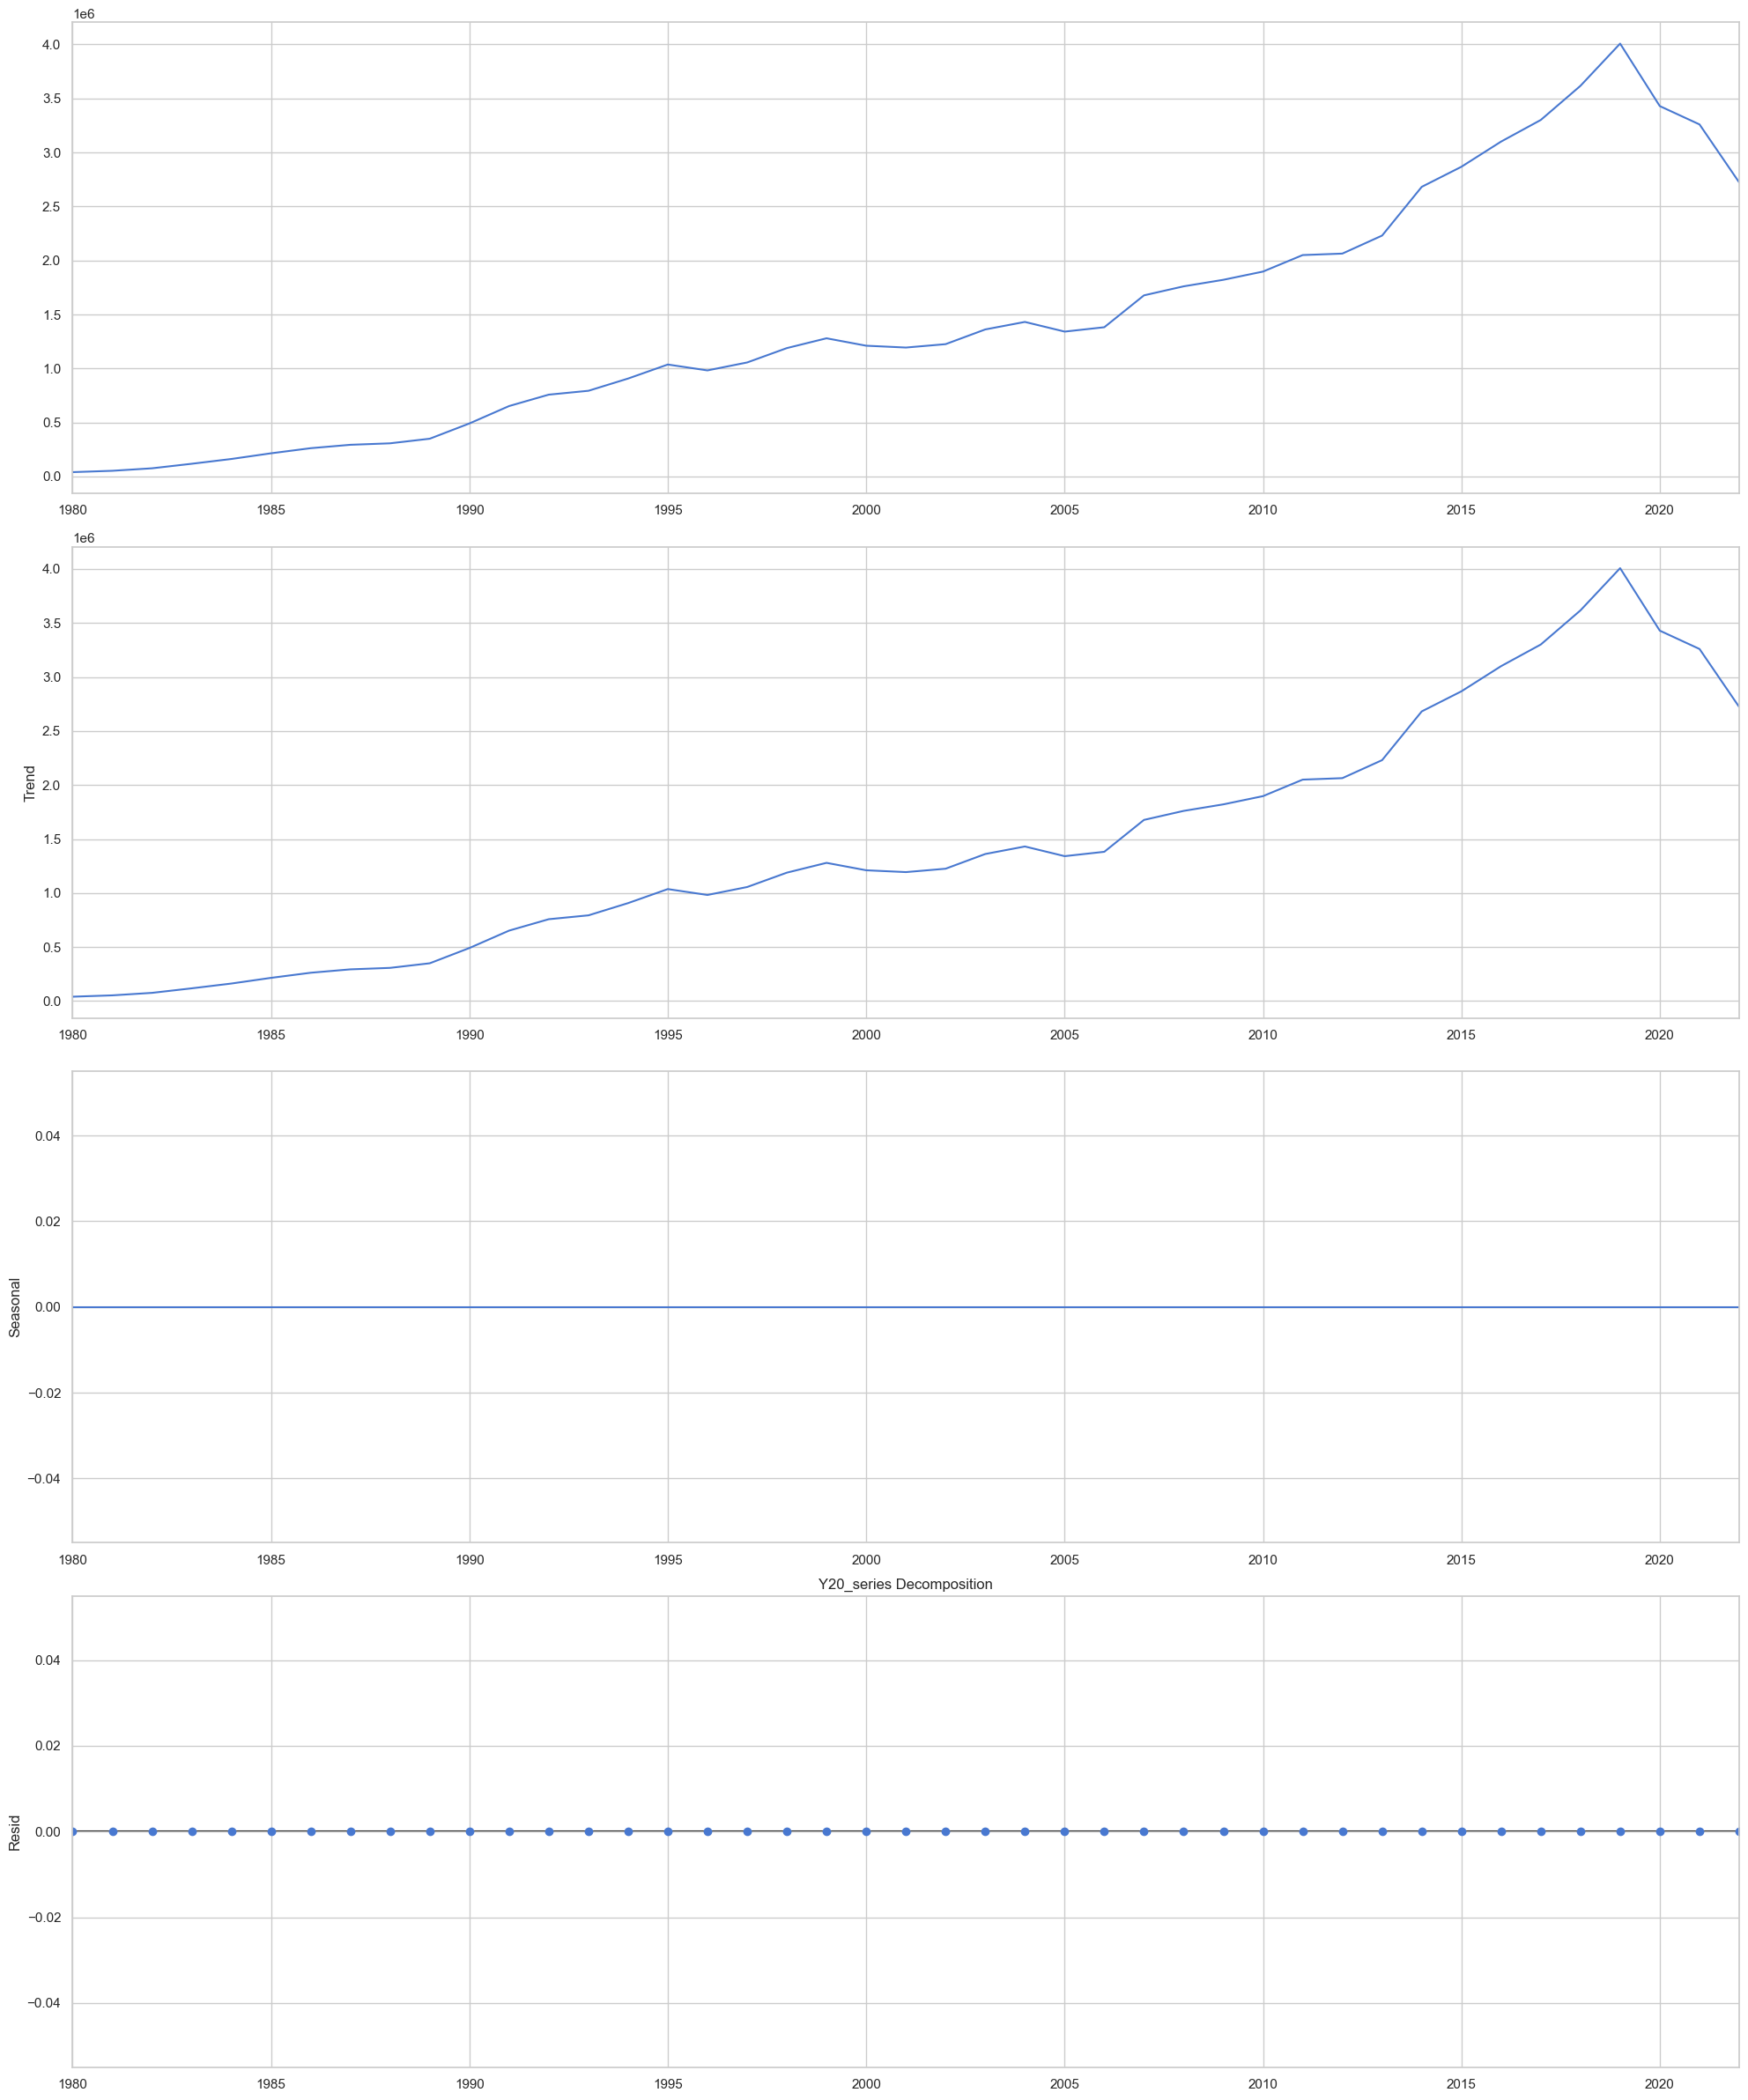

In [53]:
rcParams['figure.figsize'] = 20,24
decomposition = sm.tsa.seasonal_decompose(Y20_series, model='additive')
fig = decomposition.plot()
plt.title('Y20_series Decomposition')
plt.show()

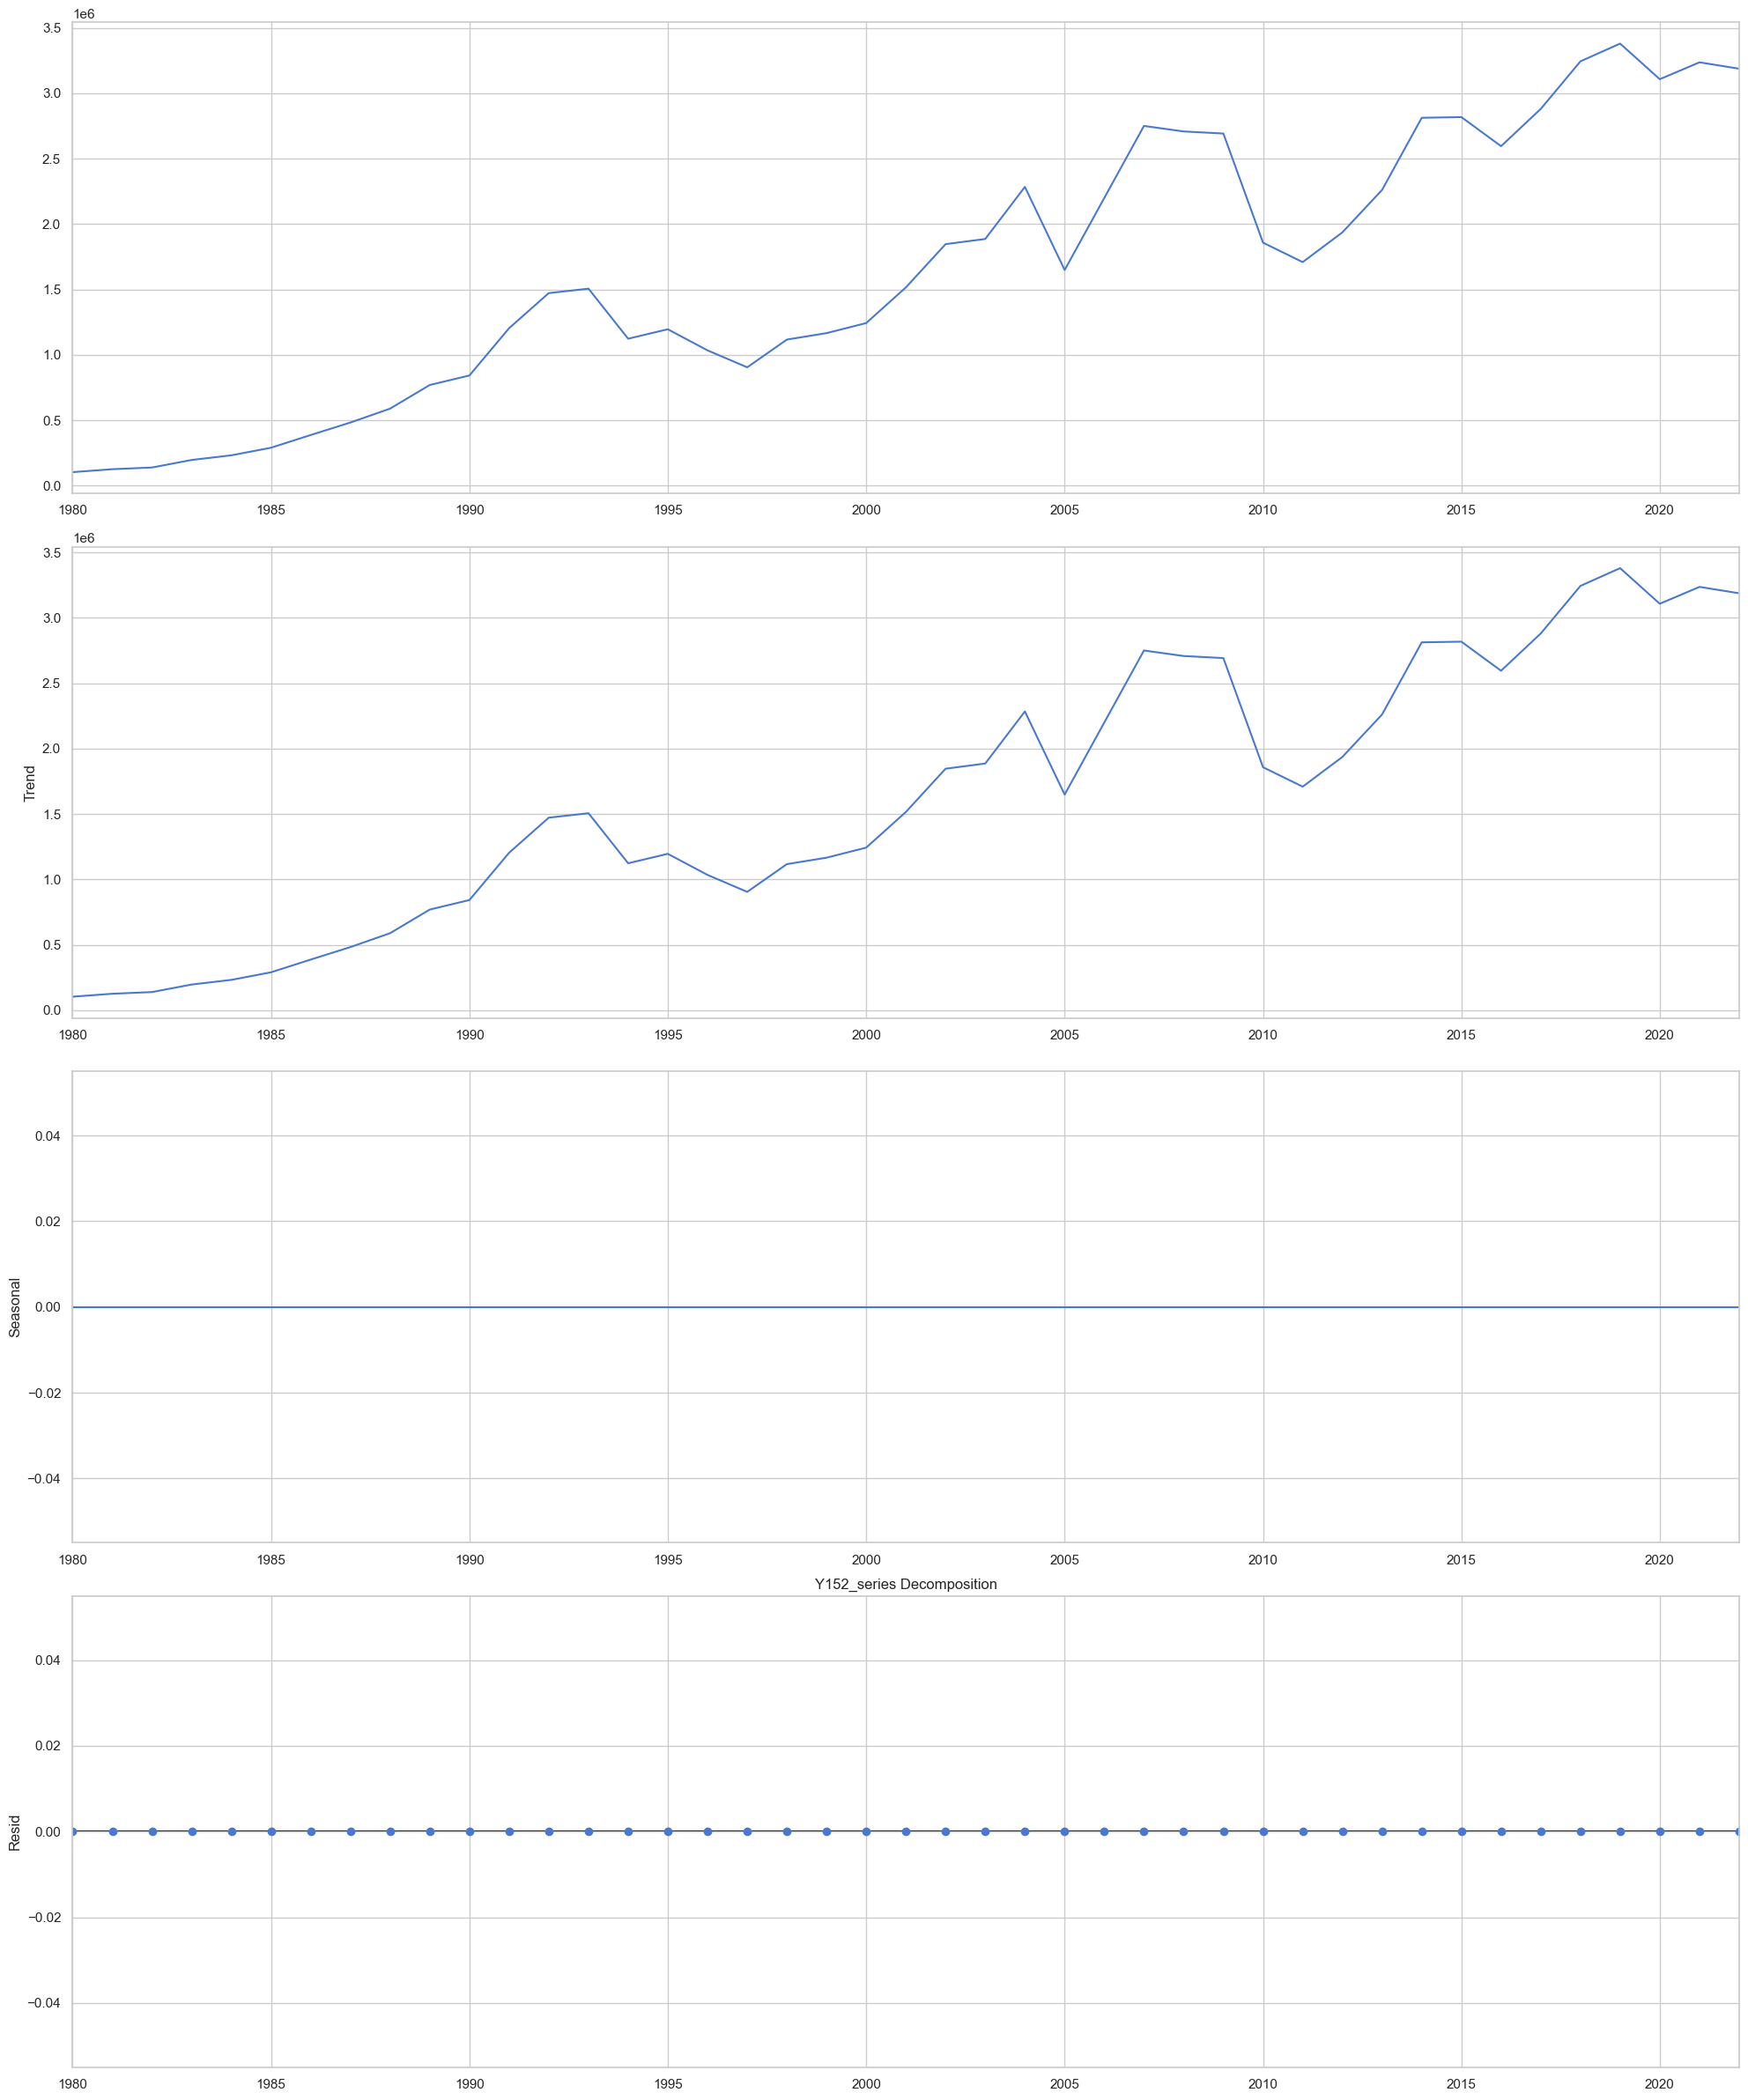

In [58]:
decomposition = sm.tsa.seasonal_decompose(Y152_series, model='additive')
fig = decomposition.plot()
plt.title('Y152_series Decomposition')
plt.show()

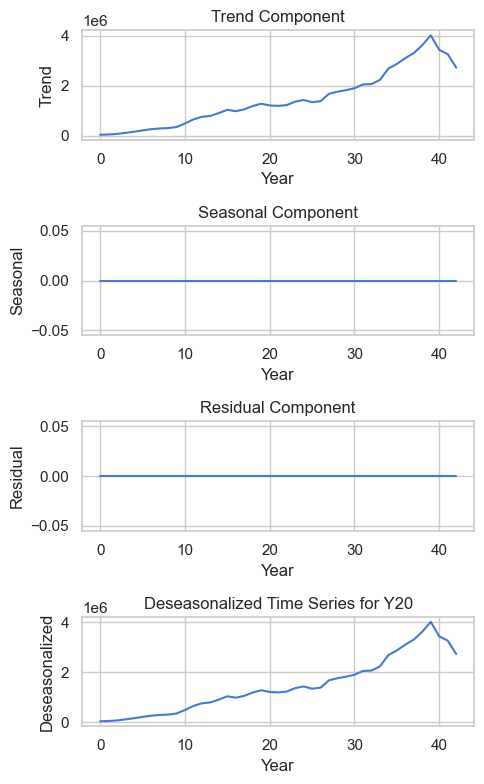

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal decomposition
result = seasonal_decompose(tourism_data["Y20"], model='additive', period=1) 

# Plot the decomposed components
plt.figure(figsize=(5, 8))

plt.subplot(4, 1, 1)
plt.plot(result.trend, label='Trend')
plt.xlabel('Year')
plt.ylabel('Trend')
plt.title('Trend Component')

plt.subplot(4, 1, 2)
plt.plot(result.seasonal, label='Seasonal')
plt.xlabel('Year')
plt.ylabel('Seasonal')
plt.title('Seasonal Component')

plt.subplot(4, 1, 3)
plt.plot(result.resid, label='Residual')
plt.xlabel('Year')
plt.ylabel('Residual')
plt.title('Residual Component')

plt.subplot(4, 1, 4)
plt.plot(tourism_data["Y20"] - result.resid, label='Deseasonalized')
plt.xlabel('Year')
plt.ylabel('Deseasonalized')
plt.title('Deseasonalized Time Series for Y20')

plt.tight_layout()
plt.show()

In [68]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# # Seasonal decomposition
# result = seasonal_decompose(tourism_data["Y152"]) 

# # Plot the decomposed components
# plt.figure(figsize=(5, 8))

# plt.subplot(4, 1, 1)
# plt.plot(result.trend, label='Trend')
# plt.xlabel('Year')
# plt.ylabel('Trend')
# plt.title('Trend Component')

# plt.subplot(4, 1, 2)
# plt.plot(result.seasonal, label='Seasonal')
# plt.xlabel('Year')
# plt.ylabel('Seasonal')
# plt.title('Seasonal Component')

# plt.subplot(4, 1, 3)
# plt.plot(result.resid, label='Residual')
# plt.xlabel('Year')
# plt.ylabel('Residual')
# plt.title('Residual Component')

# plt.subplot(4, 1, 4)
# plt.plot(tourism_data["Y152"] - result.resid, label='Deseasonalized')
# plt.xlabel('Year')
# plt.ylabel('Deseasonalized')
# plt.title('Deseasonalized Time Series')

# plt.tight_layout()
# plt.show()

<Figure size 600x600 with 0 Axes>

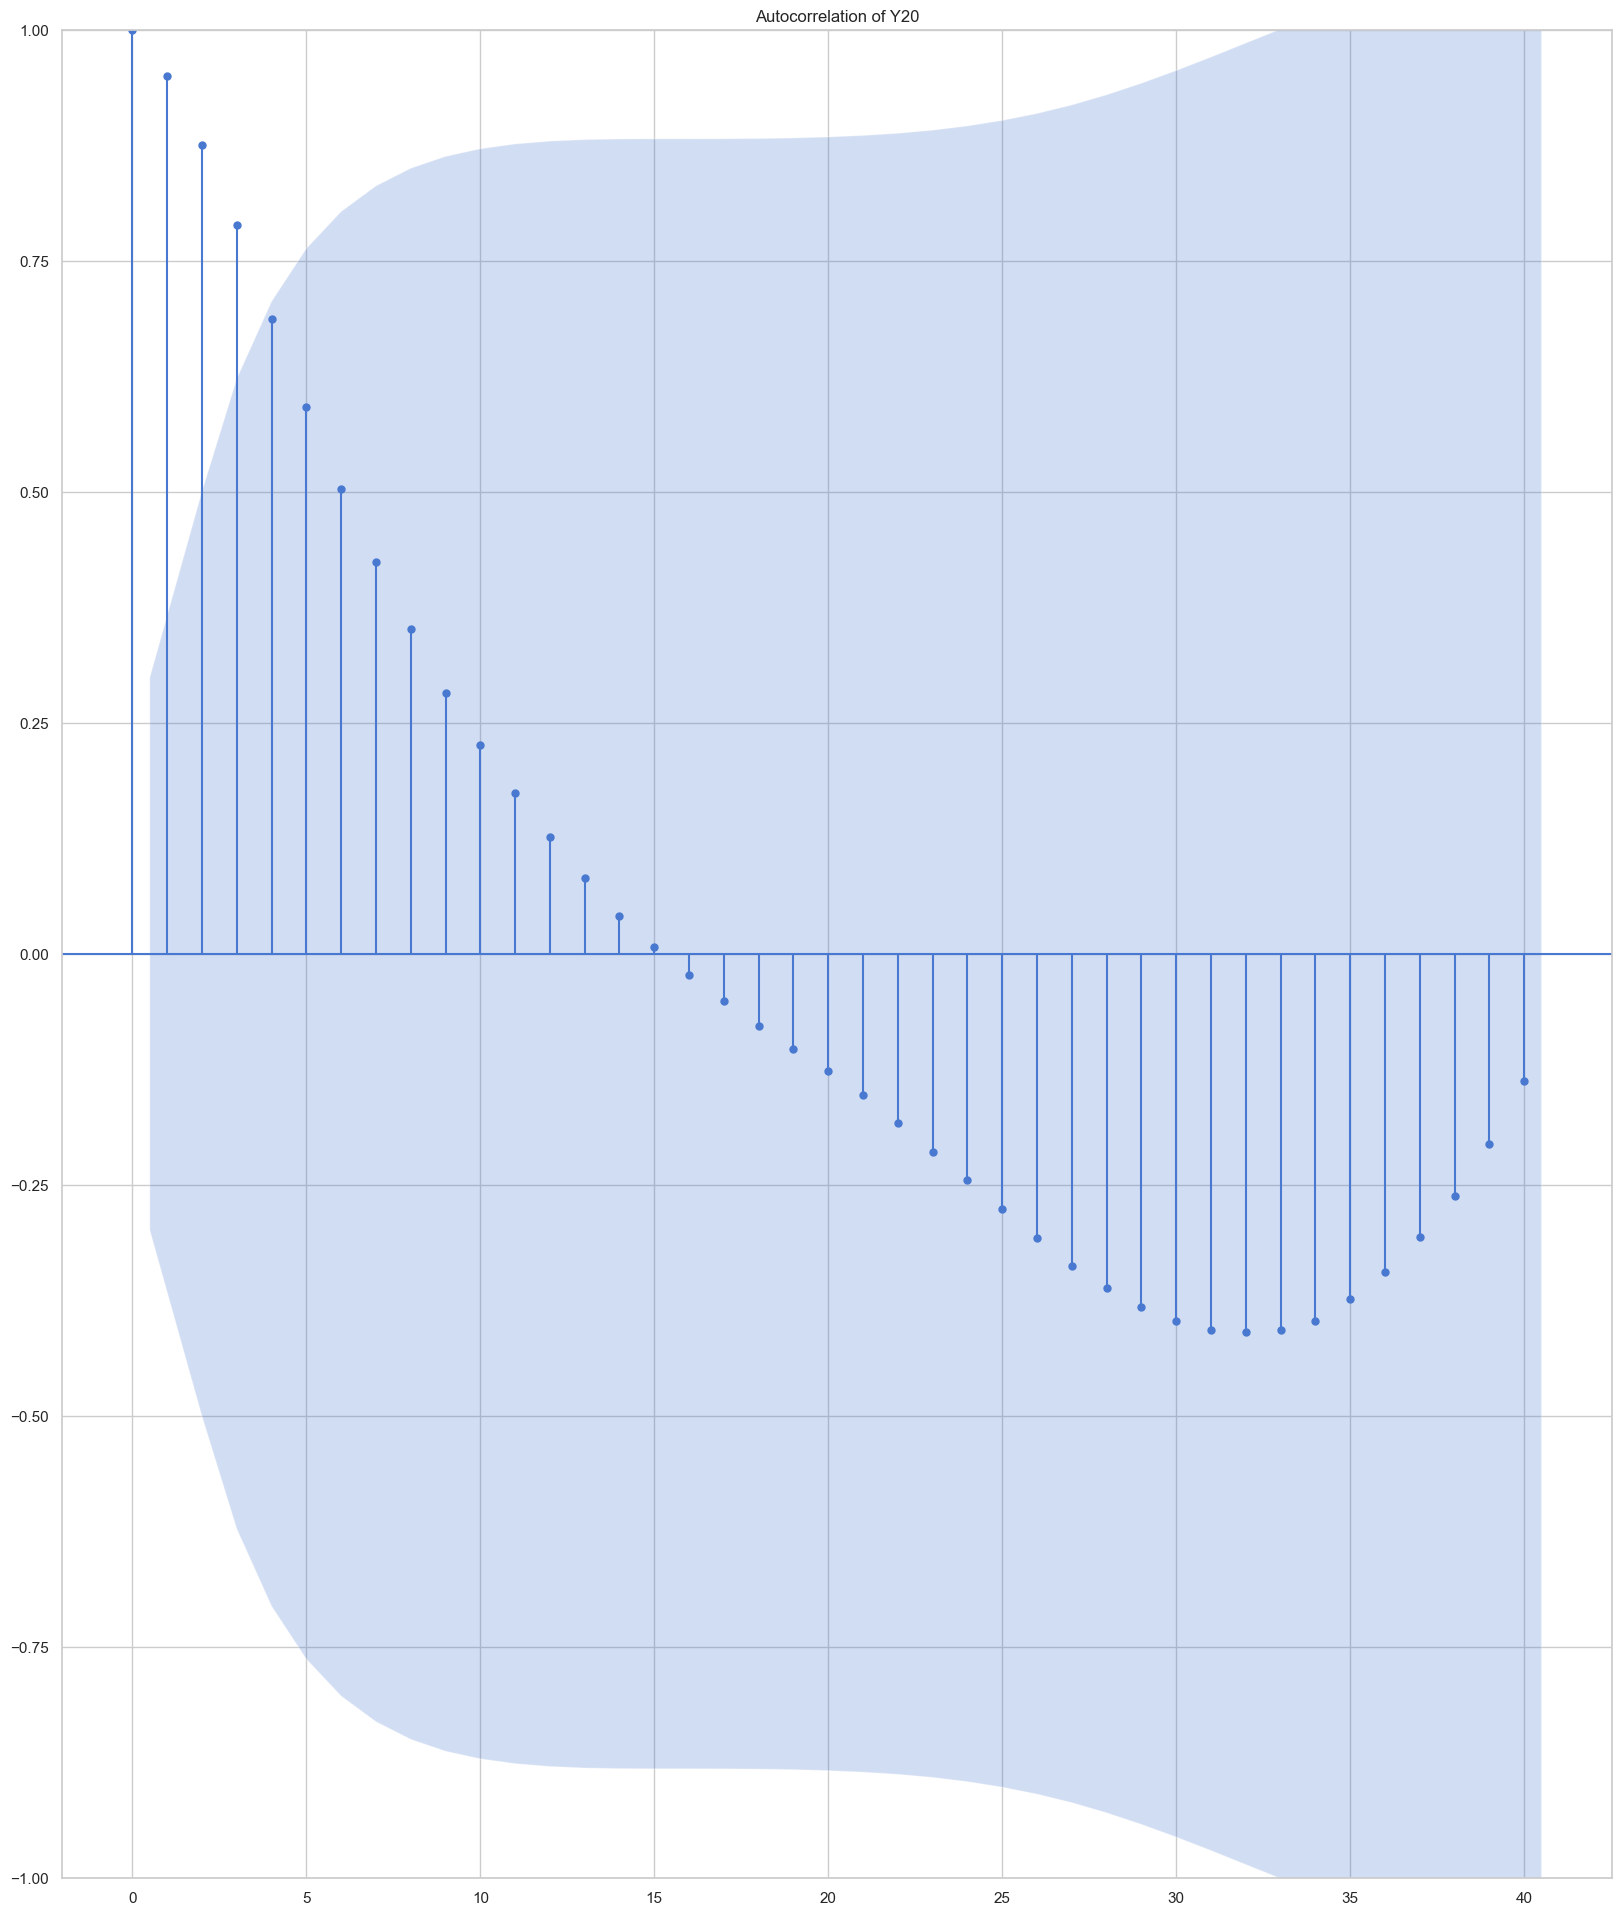

In [13]:
plt.figure(figsize=(6, 6))
sm.graphics.tsa.plot_acf(tourism_data['Y20'].squeeze(), lags=40)
plt.grid(True)
plt.title('Autocorrelation of Y20')
plt.show()

<Figure size 600x600 with 0 Axes>

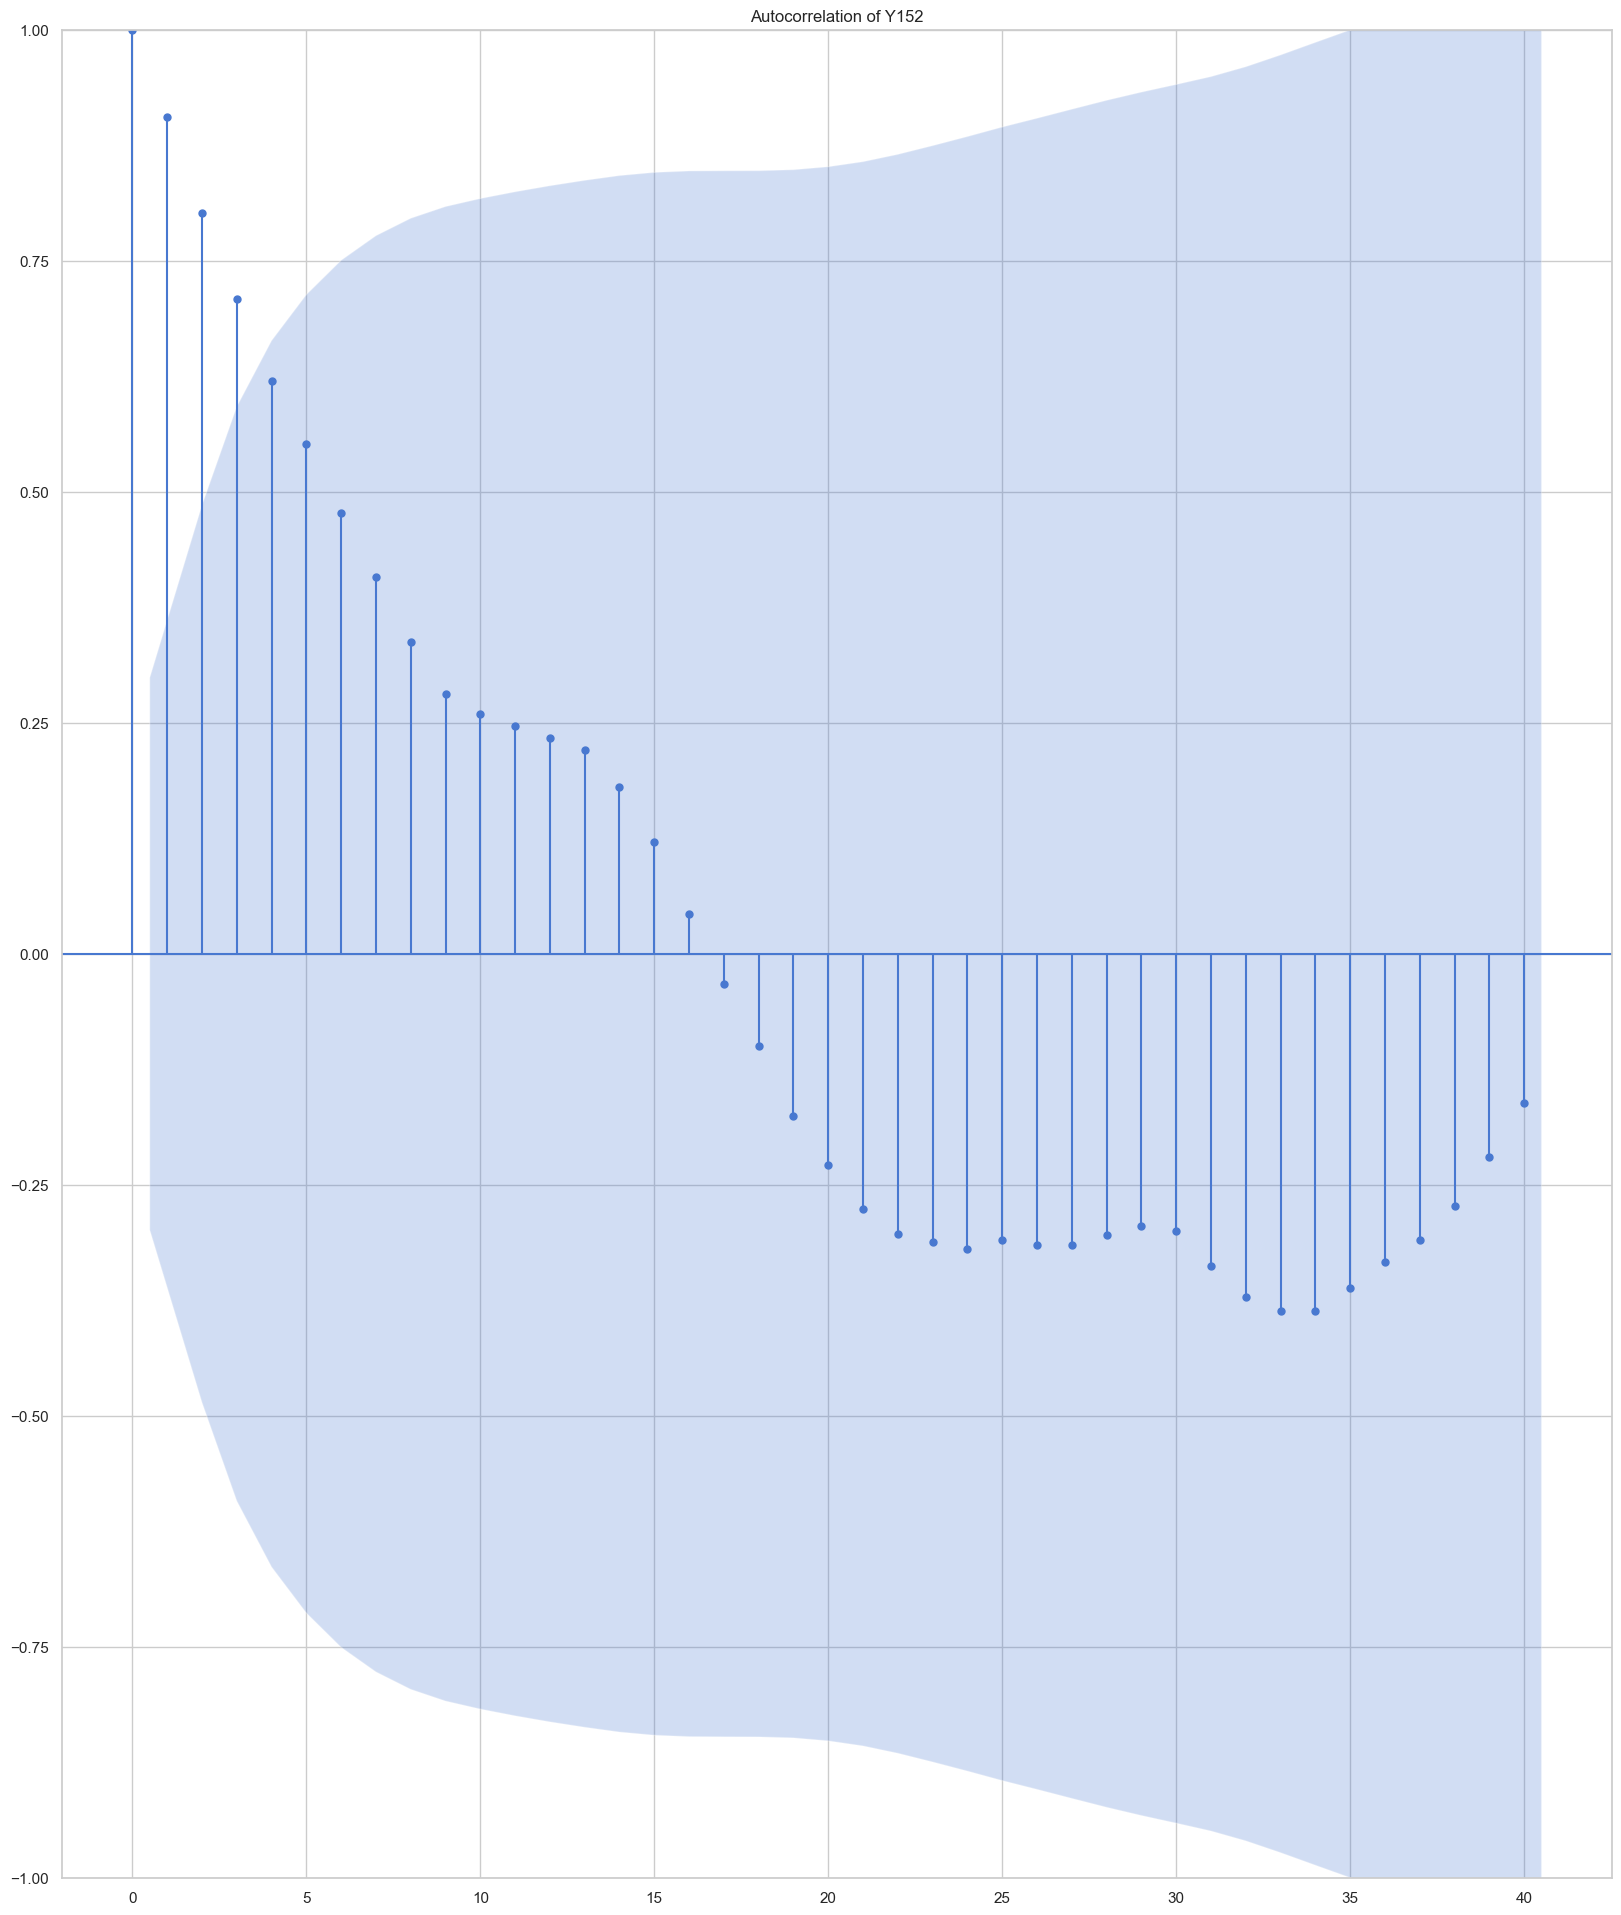

In [14]:
plt.figure(figsize=(6, 6))
sm.graphics.tsa.plot_acf(tourism_data['Y152'].squeeze(), lags=40)
plt.grid(True)
plt.title('Autocorrelation of Y152')
plt.show()

In [15]:
# 2. Partition the series into training and validation
train_data = tourism_data[:-4]
validation_data = tourism_data[-4:]

In [16]:
validation_data.isna().sum()

Y20     0
Y152    0
Year    0
dtype: int64

In [17]:
for horizon in range(1, 5):
    validation_data[f'Forecast_Y20_{horizon}'] = train_data['Y20'].iloc[-horizon]
    validation_data[f'Forecast_Y152_{horizon}'] = train_data['Y152'].iloc[-horizon]

In [18]:
validation_data

,Y20,Y152,Year,Forecast_Y20_1,Forecast_Y152_1,Forecast_Y20_2,Forecast_Y152_2,Forecast_Y20_3,Forecast_Y152_3,Forecast_Y20_4,Forecast_Y152_4
39,4007700,3379535,2019,3616870,3244070,3300970,2880770,3100420,2595340,2867490,2817600
40,3429325,3107408,2020,3616870,3244070,3300970,2880770,3100420,2595340,2867490,2817600
41,3259398,3236384,2021,3616870,3244070,3300970,2880770,3100420,2595340,2867490,2817600
42,2722668,3187525,2022,3616870,3244070,3300970,2880770,3100420,2595340,2867490,2817600


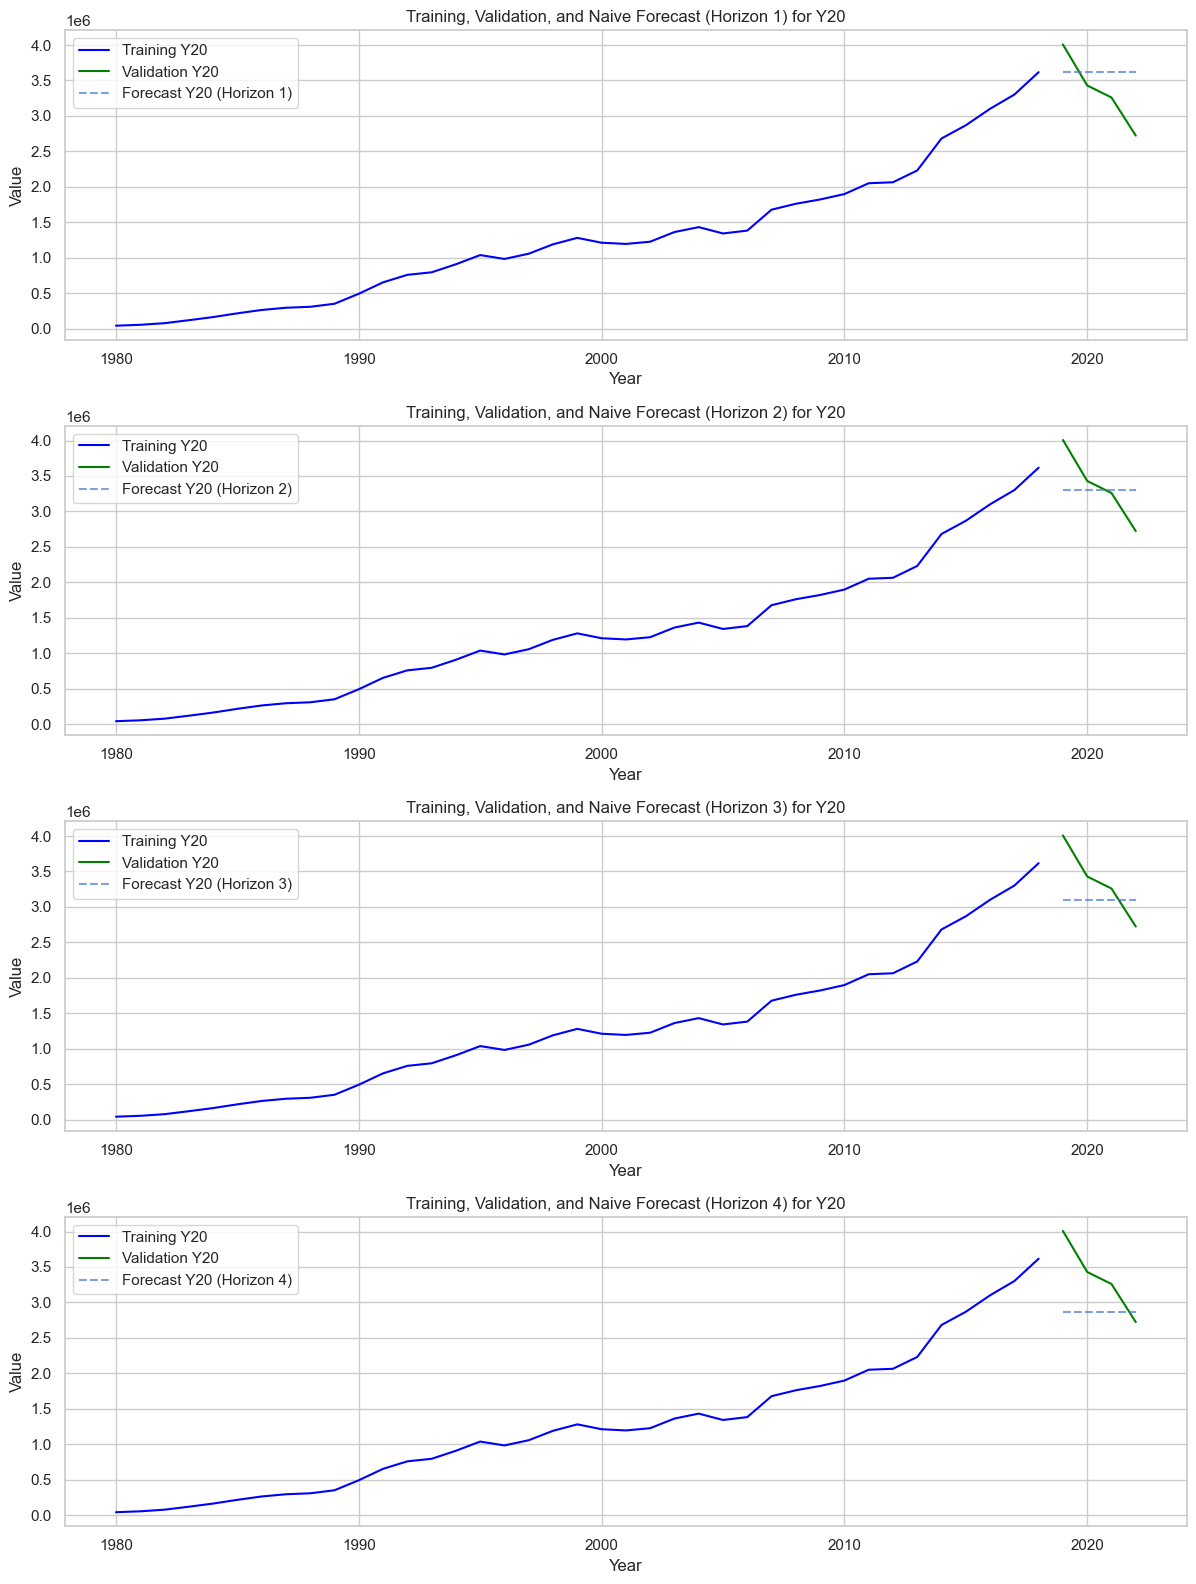

In [19]:
plt.figure(figsize=(12, 16))
for horizon in range(1, 5):
    plt.subplot(4, 1, horizon)
    
    # Plot the actual values for training and validation
    plt.plot(train_data['Year'], train_data['Y20'], label='Training Y20', color='blue')
    plt.plot(validation_data['Year'], validation_data['Y20'], label='Validation Y20', color='green')
    
    # Plot the naive forecast for the current horizon
    plt.plot(validation_data['Year'], validation_data[f'Forecast_Y20_{horizon}'], linestyle='dashed', label=f'Forecast Y20 (Horizon {horizon})', alpha=0.7)
    
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title(f'Training, Validation, and Naive Forecast (Horizon {horizon}) for Y20')
    plt.legend()

plt.tight_layout()
plt.show()

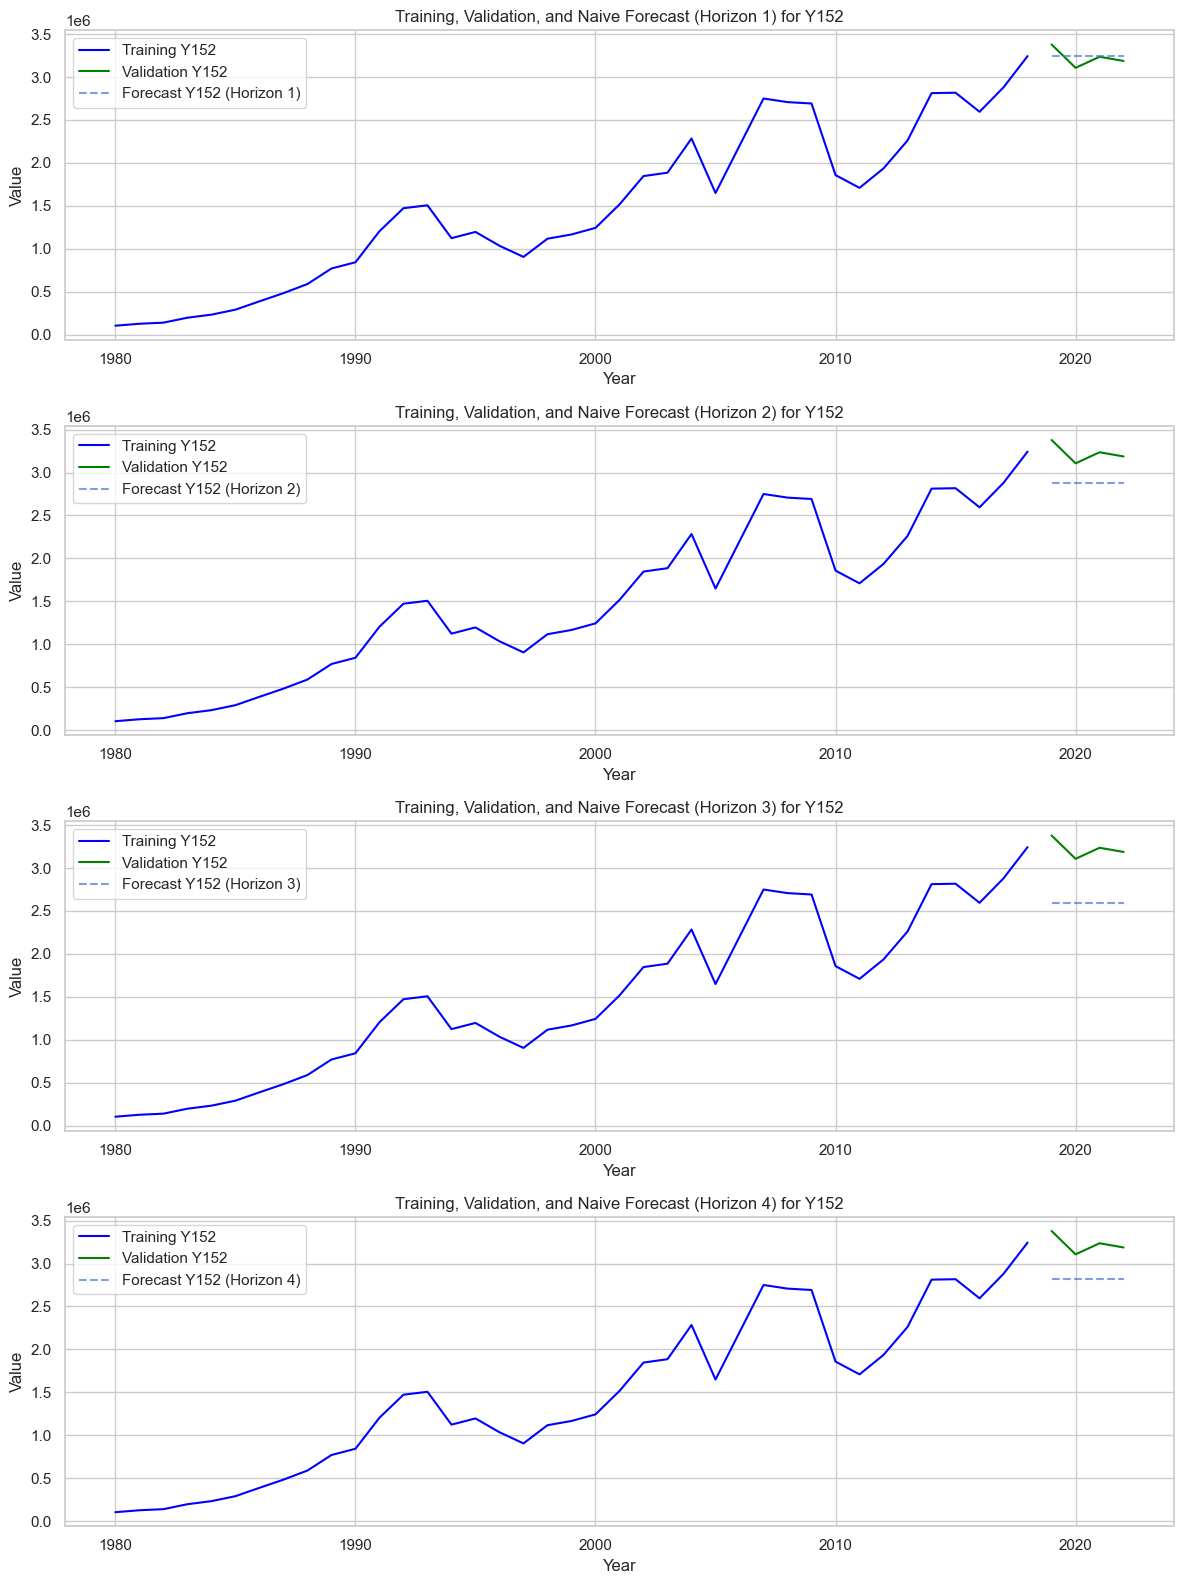

In [20]:
plt.figure(figsize=(12, 16))
for horizon in range(1, 5):
    plt.subplot(4, 1, horizon)
    
    # Plot the actual values for training and validation
    plt.plot(train_data['Year'], train_data['Y152'], label='Training Y152', color='blue')
    plt.plot(validation_data['Year'], validation_data['Y152'], label='Validation Y152', color='green')
    
    # Plot the naive forecast for the current horizon
    plt.plot(validation_data['Year'], validation_data[f'Forecast_Y152_{horizon}'], linestyle='dashed', label=f'Forecast Y152 (Horizon {horizon})', alpha=0.7)
    
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title(f'Training, Validation, and Naive Forecast (Horizon {horizon}) for Y152')
    plt.legend()

plt.tight_layout()
plt.show()

In [23]:
for i in range(len(validation_data)):
    validation_data['Y20_naive'] = train_data['Y20'].iloc[-1]
    validation_data['Y152_naive'] = train_data['Y152'].iloc[-1]


In [24]:
train_data.loc[: , 'Y20_naive'] = [np.nan] + train_data.iloc[:-1 , 0].tolist()
train_data.loc[: , 'Y152_naive'] = [np.nan] + train_data.iloc[:-1 , 1].tolist()

In [25]:
def calculate_mape(true_values, forecast_values):
    return  np.mean(np.abs((true_values - forecast_values)/true_values))*100

#Y20 validation
mape_validation_Y20 = calculate_mape(validation_data['Y20'], validation_data['Y20_naive'])
mape_train_Y20 = calculate_mape(train_data['Y20'], train_data['Y20_naive'])
print("MAPE for Training - Y20:", mape_train_Y20)
print("MAPE for Validation - Y20:", mape_validation_Y20)

#Y152 validation
mape_validation_Y152 = calculate_mape(validation_data['Y152'], validation_data['Y152_naive'])
mape_train_Y152 = calculate_mape(train_data['Y152'], train_data['Y152_naive'])
print("MAPE for Training - Y152:", mape_train_Y152)
print("MAPE for Validation - Y152:", mape_validation_Y152)

MAPE for Training - Y20: 11.552918908727571
MAPE for Validation - Y20: 14.757780132072615
MAPE for Training - Y152: 15.966113372749092
MAPE for Validation - Y152: 2.604441944525717


In [26]:
def calculate_mase(true_values, naive_values, forecast_values):
    # Calculate mean absolute error
    mae = np.mean(np.abs(true_values - naive_values))
    
    # Calculate mean absolute error of a naïve forecast
    mae_naive = np.mean(np.abs(forecast_values - forecast_values.shift(1)))
    
    # Calculate MASE
    mase = (mae / mae_naive)
    
    return mase

# Y20 validation
mase_validation_Y20 = calculate_mase(validation_data['Y20'], validation_data['Y20_naive'], train_data['Y20'])
mase_train_Y20 = calculate_mase(train_data['Y20'], train_data['Y20_naive'], train_data['Y20'])

print("MASE for Training - Y20:", mase_train_Y20)
print("MASE for Validation - Y20:", mase_validation_Y20)

# Y152 validation
mase_validation_Y152 = calculate_mase(validation_data['Y152'], validation_data['Y152_naive'], train_data['Y152'])
mase_train_Y152 = calculate_mase(train_data['Y152'], train_data['Y152_naive'], train_data['Y152'])

print("MASE for Training - Y152:", mase_train_Y152)
print("MASE for Validation - Y152:", mase_validation_Y152)

MASE for Training - Y20: 1.0
MASE for Validation - Y20: 4.307816799416224
MASE for Training - Y152: 1.0
MASE for Validation - Y152: 0.38571926589513184


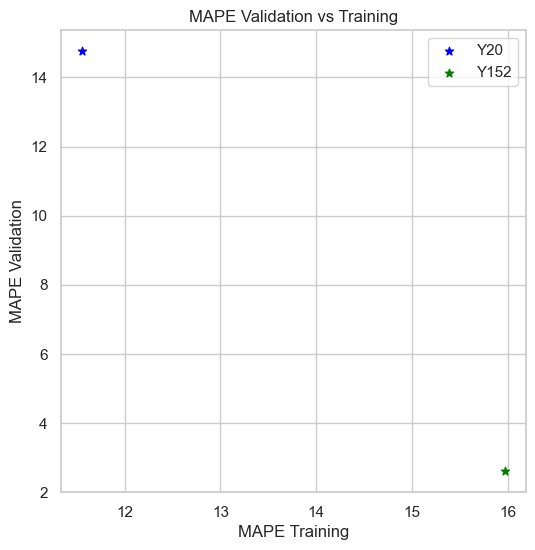

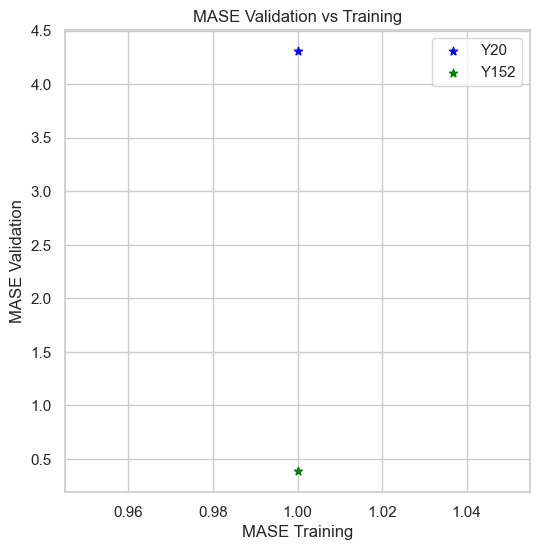

In [27]:
#scatter plot of MAPE validation vs training
plt.figure(figsize=(6, 6))
plt.scatter(mape_train_Y20, mape_validation_Y20, color='blue', label='Y20',marker='*')
plt.scatter(mape_train_Y152, mape_validation_Y152, color='green', label='Y152',marker='*')
plt.xlabel('MAPE Training')
plt.ylabel('MAPE Validation')
plt.title('MAPE Validation vs Training')
plt.legend()
plt.show()

#scatter plot of MASE validation vs training
plt.figure(figsize=(6, 6))
plt.scatter(mase_train_Y20, mase_validation_Y20, color='blue', label='Y20',marker='*')
plt.scatter(mase_train_Y152, mase_validation_Y152, color='green', label='Y152',marker='*')
plt.xlabel('MASE Training')
plt.ylabel('MASE Validation')
plt.title('MASE Validation vs Training')
plt.legend()
plt.show()

In [28]:
#forecasting

In [29]:
# Naive forecast with a constant trend
def naive_forecast_with_trend(observed_values, growth_rate, k):
    return [value * (1 + growth_rate)**k for value in observed_values]

#predictions
naive_Y20 = naive_forecast_with_trend(validation_data['Y20'], 0.06, 1)
naive_Y152 = naive_forecast_with_trend(validation_data['Y152'], 0.06, 1)

# Compute forecast errors for each method
forecast_errors_Y20 = validation_data['Y20'] - naive_Y20
mape_validation_Y20 = calculate_mape(validation_data['Y20'], naive_Y20)
mase_validation_Y20 = calculate_mase(validation_data['Y20'], naive_Y20, train_data['Y20'])

forecast_errors_Y152 = validation_data['Y152'] - naive_Y152
mape_validation_Y152 = calculate_mape(validation_data['Y152'], naive_Y152)
mase_validation_Y152 = calculate_mase(validation_data['Y152'], naive_Y152, train_data['Y152'])

print("Forecast Errors for Y20:", forecast_errors_Y20.values.tolist())
print("MAPE for Validation - Y20:", mape_validation_Y20)
print("MASE for Validation - Y20:", mase_validation_Y20)

print("Forecast Errors for Y152:", forecast_errors_Y152.values.tolist())
print("MAPE for Validation - Y152:", mape_validation_Y152)
print("MASE for Validation - Y152:", mase_validation_Y152)

Forecast Errors for Y20: [-240462.0, -205759.5, -195563.88000000035, -163360.08000000007]
MAPE for Validation - Y20: 6.0000000000000036
MASE for Validation - Y20: 1.8952602572727315
Forecast Errors for Y152: [-202772.1000000001, -186444.47999999998, -194183.04000000004, -191251.5]
MAPE for Validation - Y152: 6.000000000000001
MASE for Validation - Y152: 0.8883328516974227


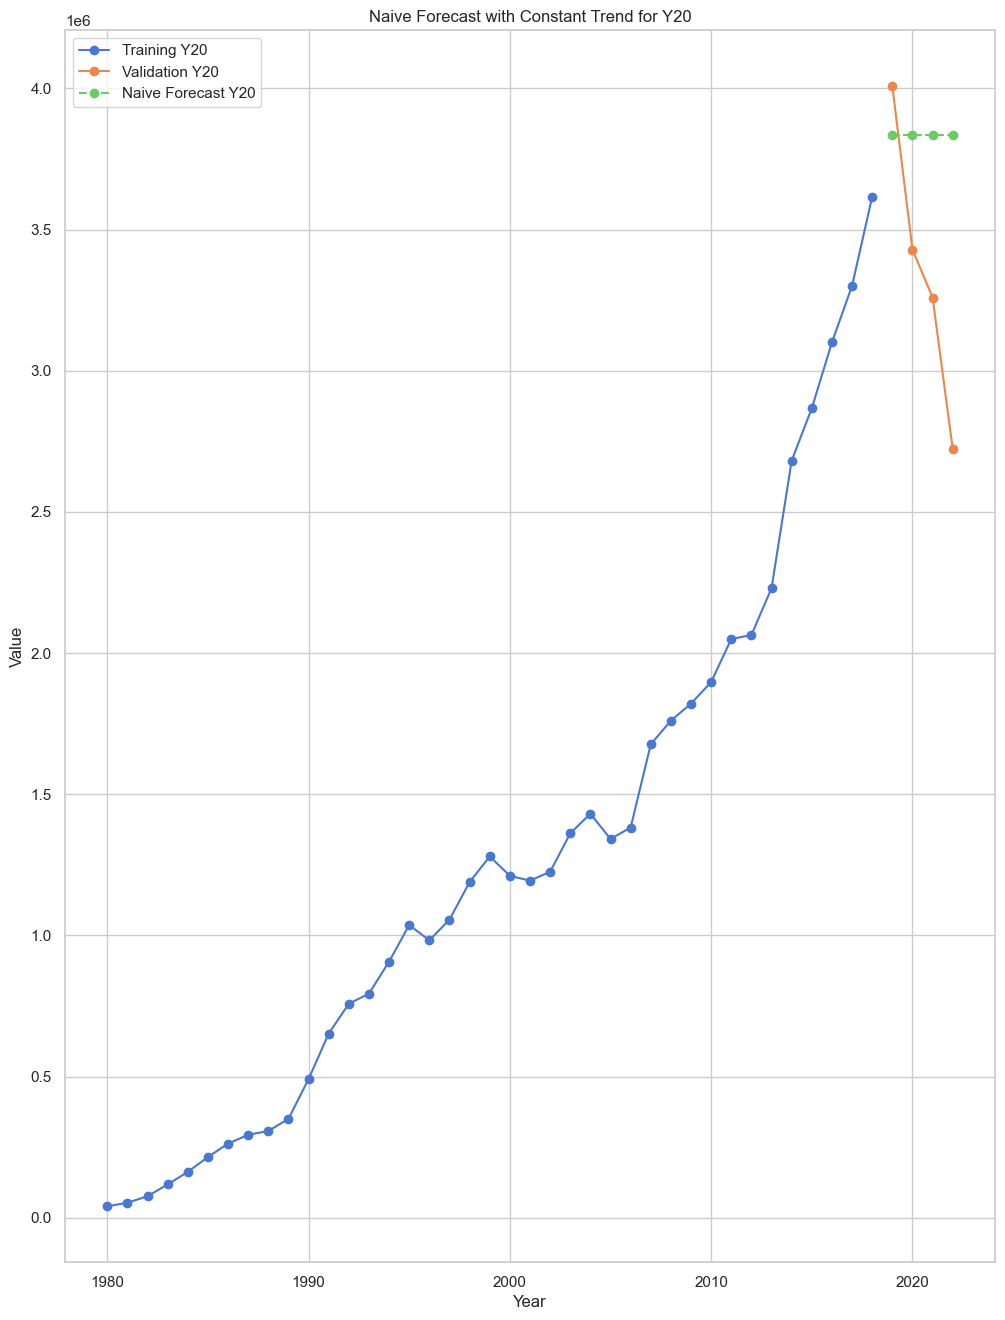

Text(0, 0.5, 'Value')

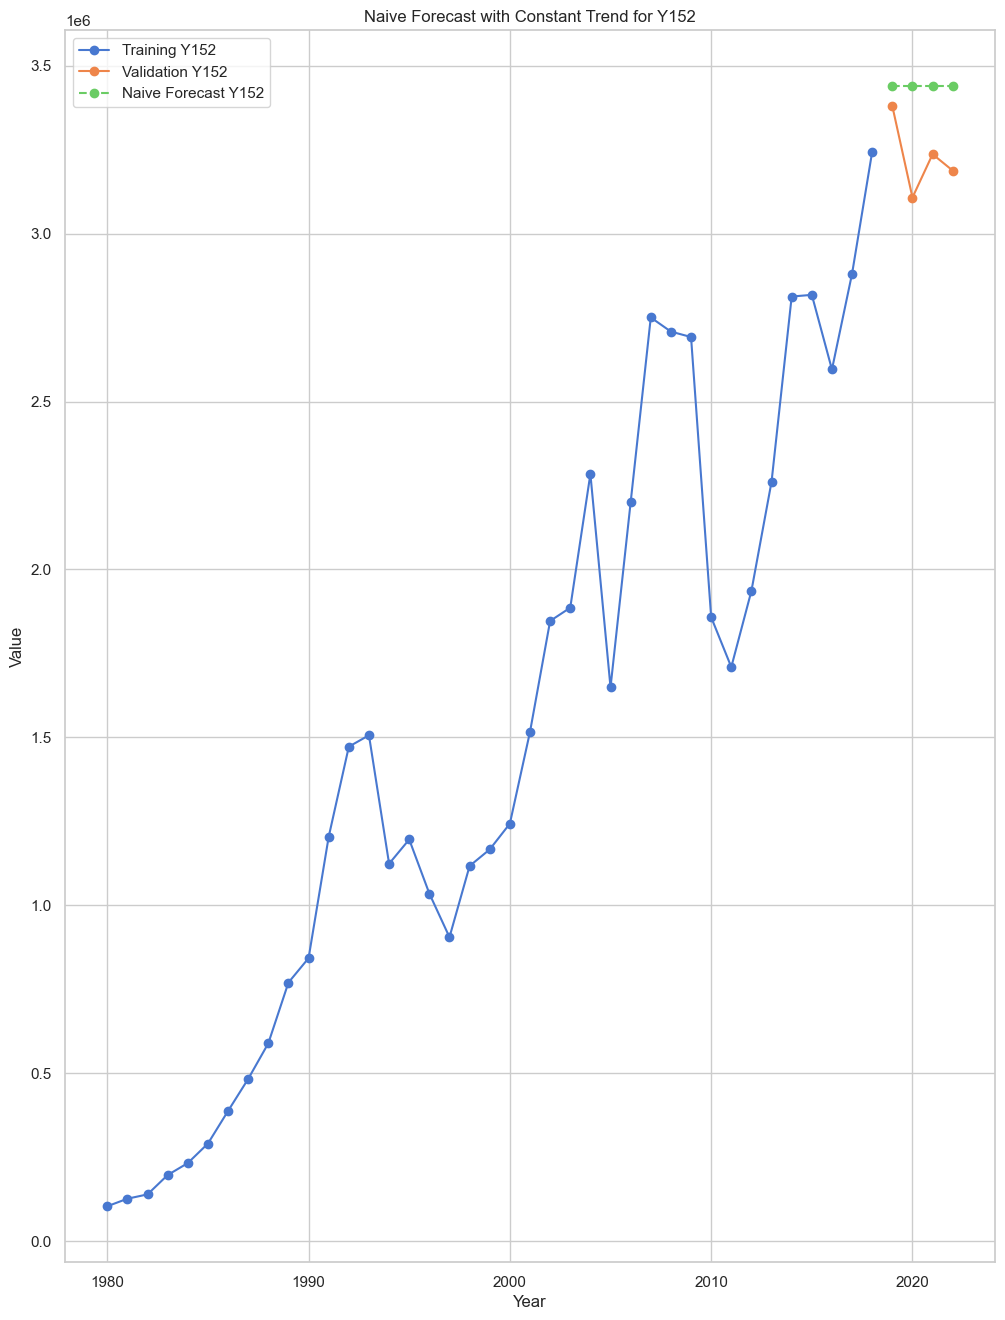

In [30]:
#plotting naive with trend
plt.figure(figsize=(12, 16))
plt.plot(train_data['Year'], train_data['Y20'], label='Training Y20',marker='o')
plt.plot(validation_data['Year'], validation_data['Y20'], label='Validation Y20',marker='o')
plt.plot(validation_data['Year'], naive_forecast_with_trend(validation_data['Y20_naive'], 0.06, 1), linestyle='dashed', label='Naive Forecast Y20',marker='o')
plt.title('Naive Forecast with Constant Trend for Y20')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

plt.figure(figsize=(12, 16))
plt.plot(train_data['Year'], train_data['Y152'], label='Training Y152',marker='o')
plt.plot(validation_data['Year'], validation_data['Y152'], label='Validation Y152',marker='o')
plt.plot(validation_data['Year'],  naive_forecast_with_trend(validation_data['Y152_naive'], 0.06, 1), linestyle='dashed', label='Naive Forecast Y152',marker='o')
plt.title('Naive Forecast with Constant Trend for Y152')
plt.xlabel('Year')
plt.legend()
plt.ylabel('Value')

In [31]:
time_indices_Y20_array = train_data["Year"].values.reshape(-1, 1)
time_indices_Y152_array = train_data["Year"].values.reshape(-1, 1)

In [32]:
#Linear Regression
linear_model_Y20 = LinearRegression()
linear_model_Y152 = LinearRegression()

linear_model_Y20.fit(time_indices_Y20_array, train_data['Y20'])
linear_model_Y152.fit(time_indices_Y152_array, train_data['Y152'])

linear_predictions_Y20 = linear_model_Y20.predict(validation_data["Year"].values.reshape(-1, 1))
linear_predictions_Y152 = linear_model_Y152.predict(validation_data["Year"].values.reshape(-1, 1))

#calculate MAPE and forecast errors
forecast_errors_Y20 = validation_data['Y20'] - linear_predictions_Y20
mape_validation_Y20 = calculate_mape(validation_data['Y20'], linear_predictions_Y20)
mase_validation_Y20 = calculate_mase(validation_data['Y20'], linear_predictions_Y20, train_data['Y20'])

forecast_errors_Y152 = validation_data['Y152'] - linear_predictions_Y152
mape_validation_Y152 = calculate_mape(validation_data['Y152'], linear_predictions_Y152)
mase_validation_Y152 = calculate_mase(validation_data['Y152'], linear_predictions_Y152, train_data['Y152'])

print('Forecast Errors Y20:', forecast_errors_Y20.values.tolist())
print("MAPE Linear Regression - Y20:", mape_validation_Y20)
print("MASE Linear Regression - Y20:", mase_validation_Y20)

print('Forecast Errors Y152:', forecast_errors_Y152.values.tolist())
print("MAPE Linear Regression - Y152:", mape_validation_Y152)
print("MASE Linear Regression - Y152:", mase_validation_Y152)

Forecast Errors Y20: [1138926.0472334623, 480240.09318488836, 230002.1391362846, -387038.8149122894]
MAPE Linear Regression - Y20: 15.9235946023908
MASE Linear Regression - Y20: 5.2638866437556375
Forecast Errors Y152: [381039.1686909497, 33061.41686910391, 86186.66504722834, -38523.086774647236]
MAPE Linear Regression - Y152: 4.05261660808676
MASE Linear Regression - Y152: 0.6178819228074433


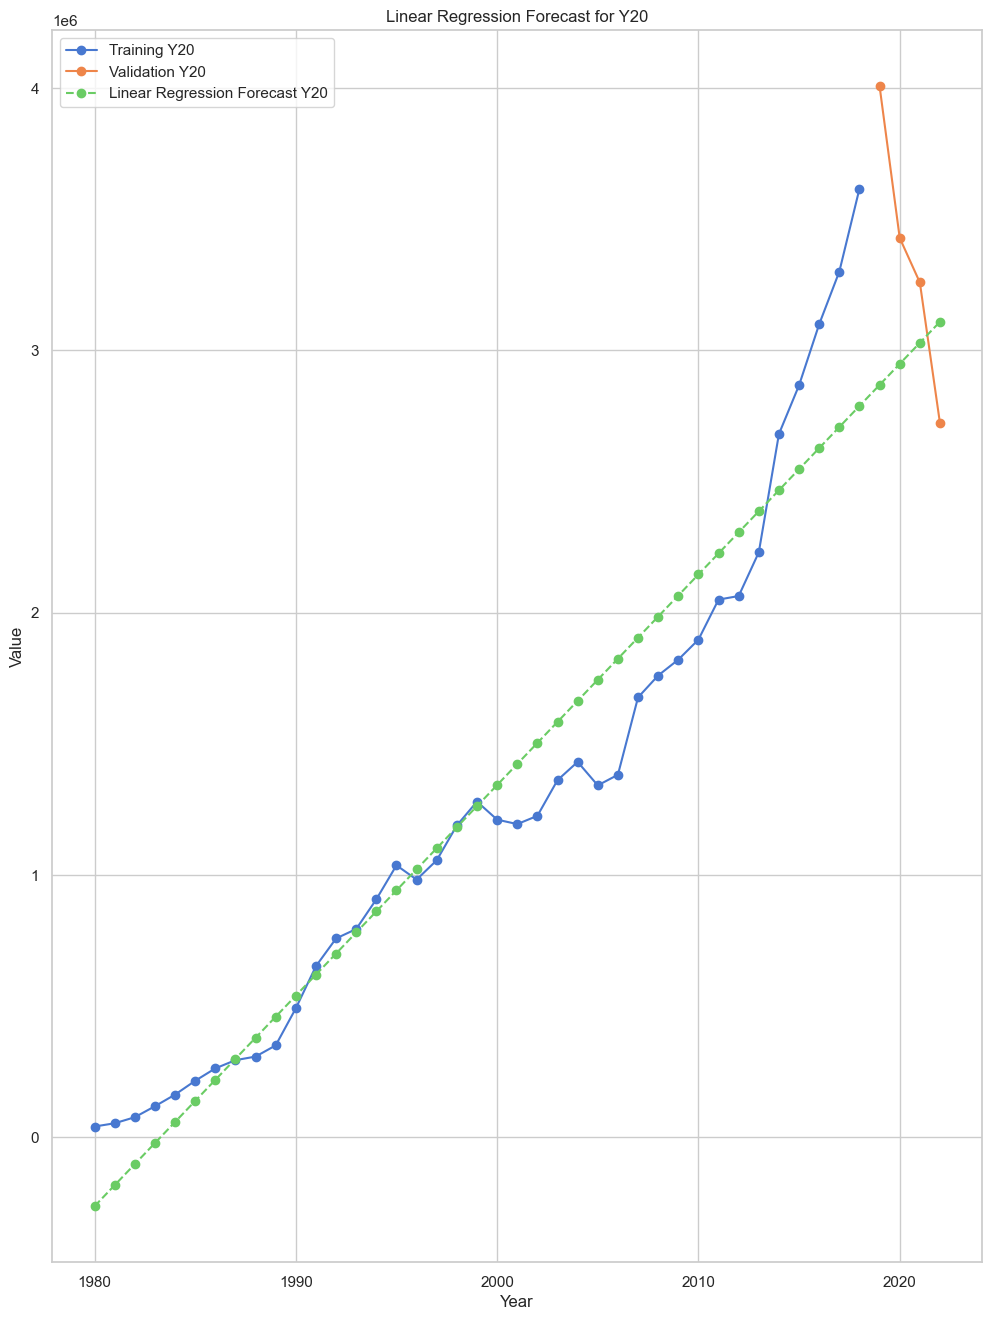

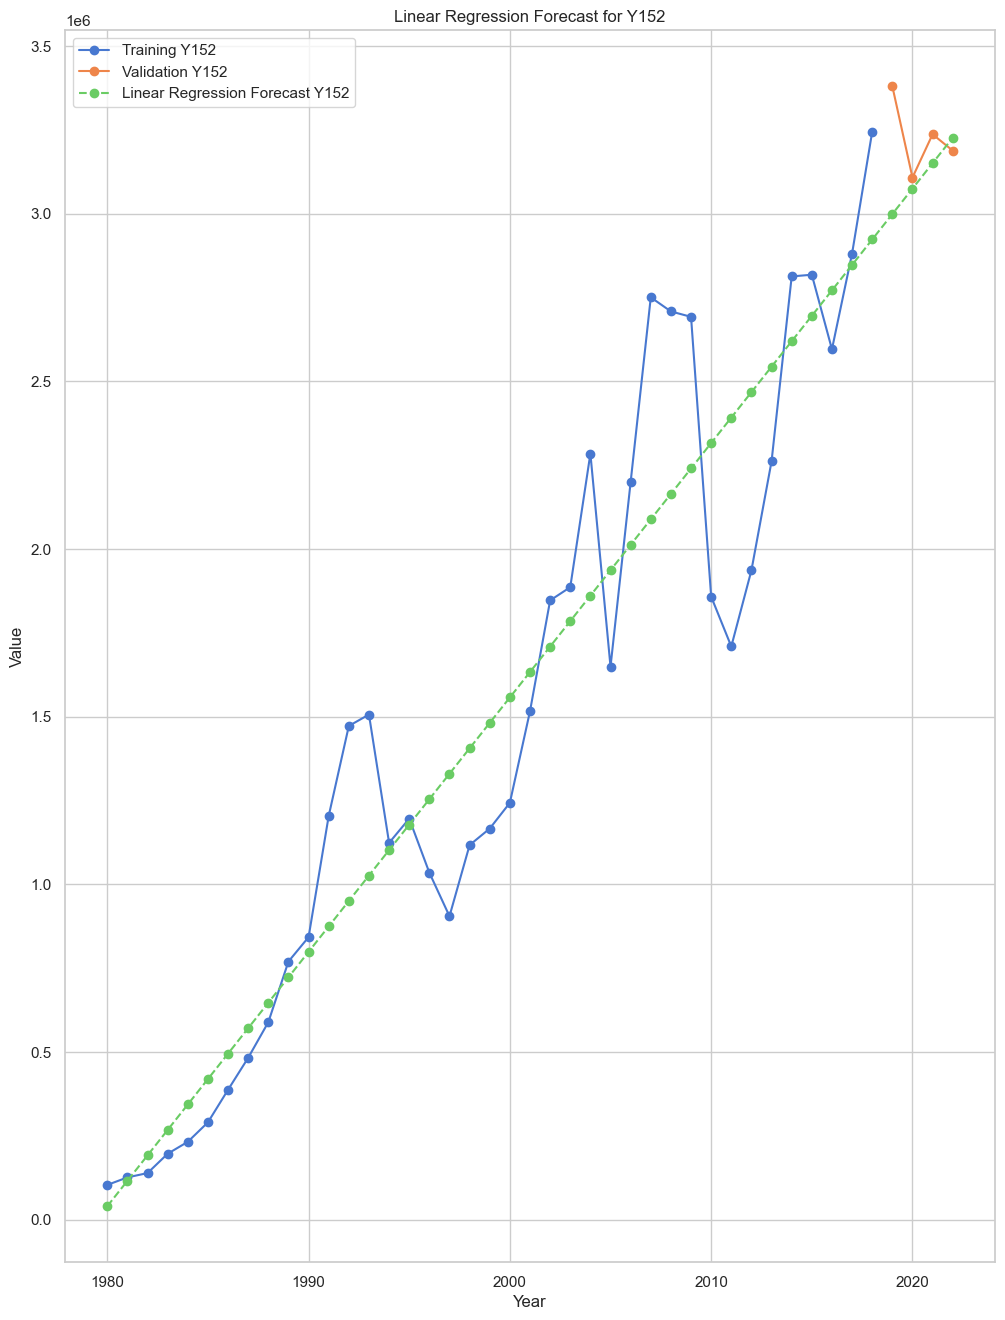

In [33]:
#plotting linear regression
x = np.linspace(1980, 2022, 43)
plt.figure(figsize=(12, 16))
plt.plot(train_data['Year'], train_data['Y20'], label='Training Y20',marker='o')
plt.plot(validation_data['Year'], validation_data['Y20'], label='Validation Y20',marker='o')
plt.plot(x, linear_model_Y20.predict(x.reshape(-1, 1)), linestyle='dashed', label='Linear Regression Forecast Y20',marker='o')
plt.title('Linear Regression Forecast for Y20')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

plt.figure(figsize=(12, 16))
plt.plot(train_data['Year'], train_data['Y152'], label='Training Y152',marker='o')
plt.plot(validation_data['Year'], validation_data['Y152'], label='Validation Y152',marker='o')
plt.plot(x, linear_model_Y152.predict(x.reshape(-1, 1)), linestyle='dashed', label='Linear Regression Forecast Y152',marker='o')
plt.title('Linear Regression Forecast for Y152')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

In [34]:
#polynomial regression
polynomial_model_Y20 = make_pipeline(PolynomialFeatures(2), LinearRegression())
polynomial_model_Y152 = make_pipeline(PolynomialFeatures(2), LinearRegression())

polynomial_model_Y20.fit(time_indices_Y20_array, train_data['Y20'])
polynomial_model_Y152.fit(time_indices_Y152_array, train_data['Y152'])

polynomial_predictions_Y20 = polynomial_model_Y20.predict(validation_data["Year"].values.reshape(-1, 1))
polynomial_predictions_Y152 = polynomial_model_Y152.predict(validation_data["Year"].values.reshape(-1, 1))

#calculate MAPE and forecast errors
forecast_errors_Y20 = validation_data['Y20'] - polynomial_predictions_Y20
mape_validation_Y20 = calculate_mape(validation_data['Y20'], polynomial_predictions_Y20)
mase_validation_Y20 = calculate_mase(validation_data['Y20'], polynomial_predictions_Y20, train_data['Y20'])

forecast_errors_Y152 = validation_data['Y152'] - polynomial_predictions_Y152
mape_validation_Y152 = calculate_mape(validation_data['Y152'], polynomial_predictions_Y152)
mase_validation_Y152 = calculate_mase(validation_data['Y152'], polynomial_predictions_Y152, train_data['Y152'])

print('Forecast Errors Y20:', forecast_errors_Y20.values.tolist())
print("MAPE Polynomial Regression - Y20:", mape_validation_Y20)
print("MASE Polynomial Regression - Y20:", mase_validation_Y20)

print('Forecast Errors Y152:', forecast_errors_Y152.values.tolist())
print("MAPE Polynomial Regression - Y152:", mape_validation_Y152)
print("MASE Polynomial Regression - Y152:", mase_validation_Y152)


Forecast Errors Y20: [686233.8750391006, -40355.90483856201, -361810.06646442413, -1053379.609837532]
MAPE Polynomial Regression - Y20: 17.022358497020146
MASE Polynomial Regression - Y20: 5.041610100043827
Forecast Errors Y152: [397978.07922023535, 52541.163977861404, 108331.19198328257, -13589.836763501167]
MAPE Polynomial Regression - Y152: 4.310147676122773
MASE Polynomial Regression - Y152: 0.6564471231943017


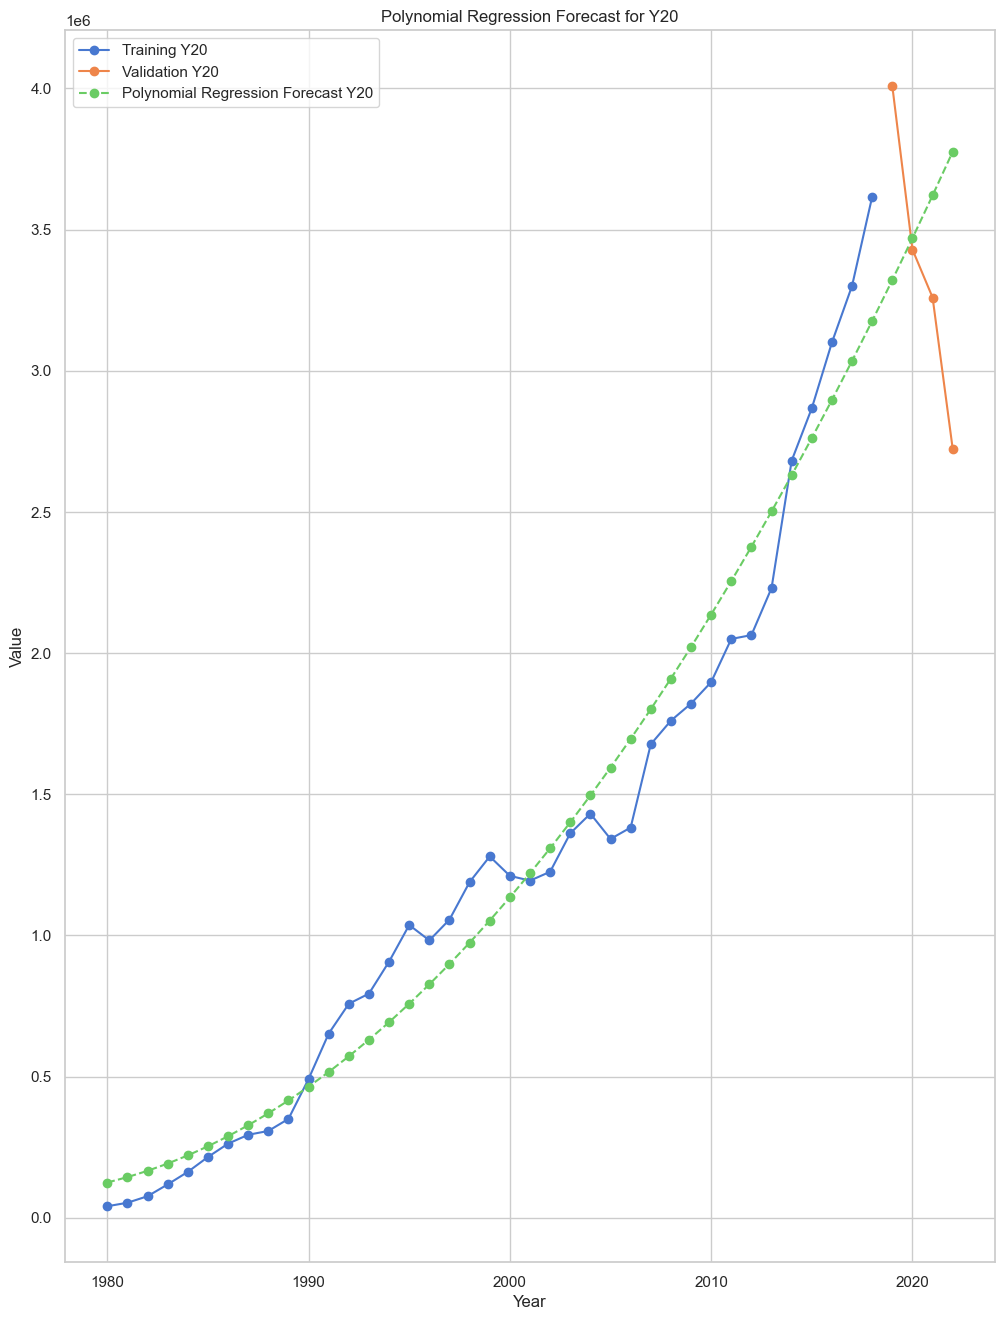

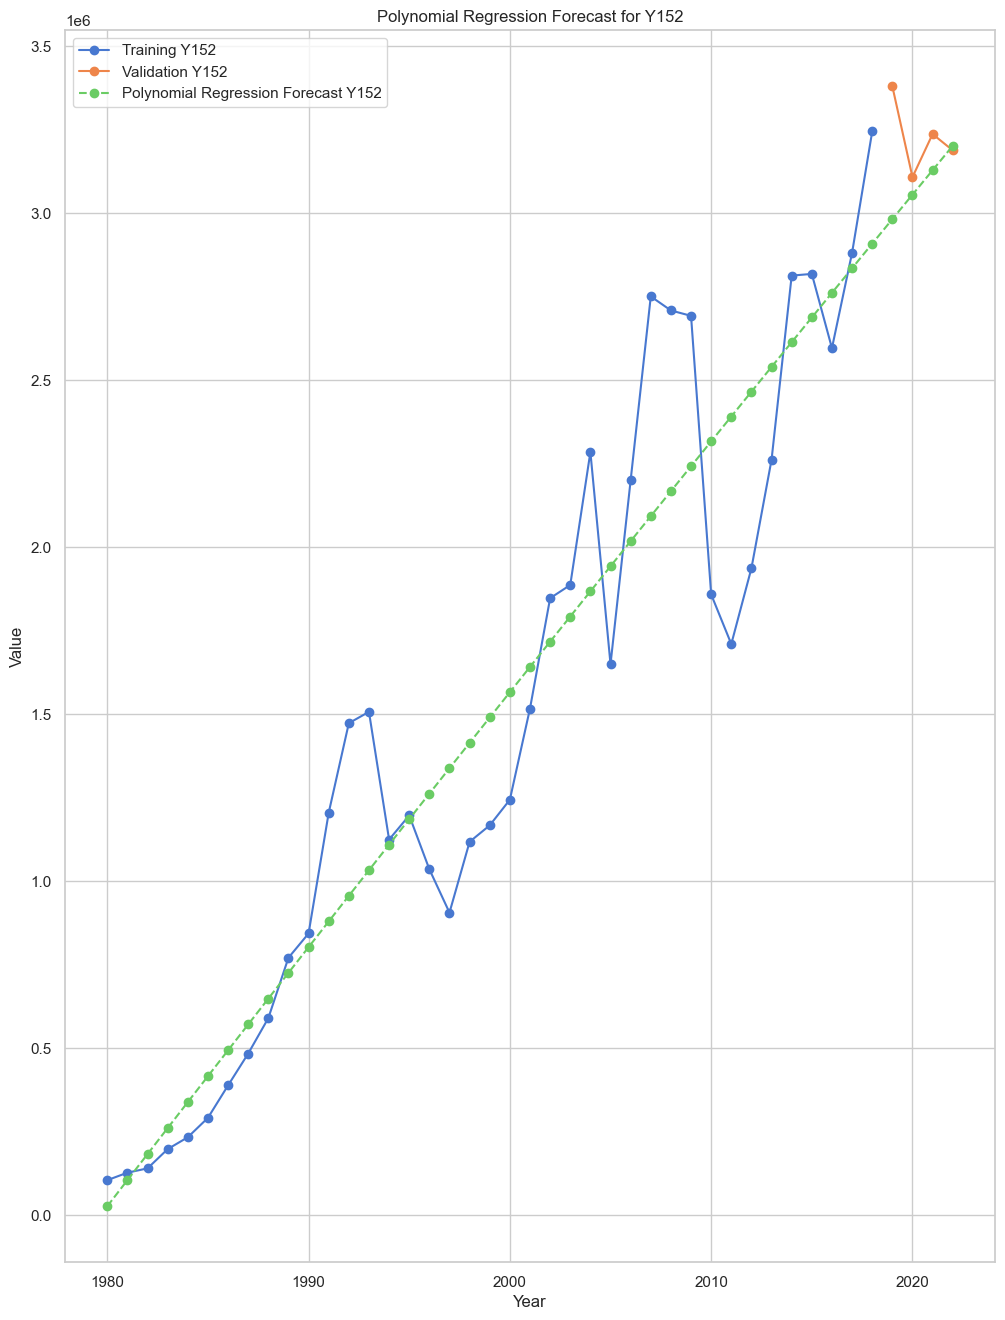

In [35]:
#plotting polynomial regression
x = np.linspace(1980, 2022, 43)
plt.figure(figsize=(12, 16))
plt.plot(train_data['Year'], train_data['Y20'], label='Training Y20',marker='o')
plt.plot(validation_data['Year'], validation_data['Y20'], label='Validation Y20',marker='o')
plt.plot(x, polynomial_model_Y20.predict(x.reshape(-1, 1)), linestyle='dashed', label='Polynomial Regression Forecast Y20',marker='o')
plt.title('Polynomial Regression Forecast for Y20')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

plt.figure(figsize=(12, 16))
plt.plot(train_data['Year'], train_data['Y152'], label='Training Y152',marker='o')
plt.plot(validation_data['Year'], validation_data['Y152'], label='Validation Y152',marker='o')
plt.plot(x, polynomial_model_Y152.predict(x.reshape(-1, 1)), linestyle='dashed', label='Polynomial Regression Forecast Y152',marker='o')
plt.title('Polynomial Regression Forecast for Y152')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

In [36]:
#exponentially weighted linear regression
weights = np.exp(-np.arange(len(train_data)))

# Normalize weights
weights /= weights.sum()

# Create a linear regression model
model = LinearRegression()

# Fit the model with exponentially-weighted data
model.fit(train_data[['Year']], train_data['Y20'], sample_weight=weights)

# Make forecasts
forecast_Y20_sklearn = model.predict(validation_data['Year'].values.reshape(-1, 1))

In [70]:
#exponentially weighted linear regression

weights = np.exp(-np.arange(len(train_data)))
weights /= weights.sum()

ew_linear_model_Y20 = LinearRegression()
ew_linear_model_Y152 = LinearRegression()

ew_linear_model_Y20.fit(time_indices_Y20_array, train_data['Y20'], sample_weight=weights)
ew_linear_model_Y152.fit(time_indices_Y152_array, train_data['Y152'], sample_weight=weights)

ew_linear_predictions_Y20 = ew_linear_model_Y20.predict(validation_data["Year"].values.reshape(-1, 1))
ew_linear_predictions_Y152 = ew_linear_model_Y152.predict(validation_data["Year"].values.reshape(-1, 1))

#calculate MAPE and forecast errors
forecast_errors_Y20 = validation_data['Y20'] - ew_linear_predictions_Y20
mape_validation_Y20 = calculate_mape(validation_data['Y20'], ew_linear_predictions_Y20)
mase_validation_Y20 = calculate_mase(validation_data['Y20'], ew_linear_predictions_Y20, train_data['Y20'])

forecast_errors_Y152 = validation_data['Y152'] - ew_linear_predictions_Y152
mape_validation_Y152 = calculate_mape(validation_data['Y152'], ew_linear_predictions_Y152)
mase_validation_Y152 = calculate_mase(validation_data['Y152'], ew_linear_predictions_Y152, train_data['Y152'])

print('Forecast Errors Y20:', forecast_errors_Y20.values.tolist())
print("MAPE Exponentially Weighted Linear Regression - Y20:", mape_validation_Y20)
print("MASE Exponentially Weighted Linear Regression - Y20:", mase_validation_Y20)

print('Forecast Errors Y152:', forecast_errors_Y152.values.tolist())
print("MAPE Exponentially Weighted Linear Regression - Y152:", mape_validation_Y152)
print("MASE Exponentially Weighted Linear Regression - Y152:", mase_validation_Y152)


Forecast Errors Y20: [2988796.228269793, 2385247.3565482944, 2190146.4848267958, 1628242.613105297]
MAPE Exponentially Weighted Linear Regression - Y20: 67.78219751804549
MASE Exponentially Weighted Linear Regression - Y20: 21.638391069448947
Forecast Errors Y152: [2110731.929864377, 1808655.180165261, 1907681.4304661378, 1828872.680767022]
MAPE Exponentially Weighted Linear Regression - Y152: 59.245424368123146
MASE Exponentially Weighted Linear Regression - Y152: 8.779467197455583


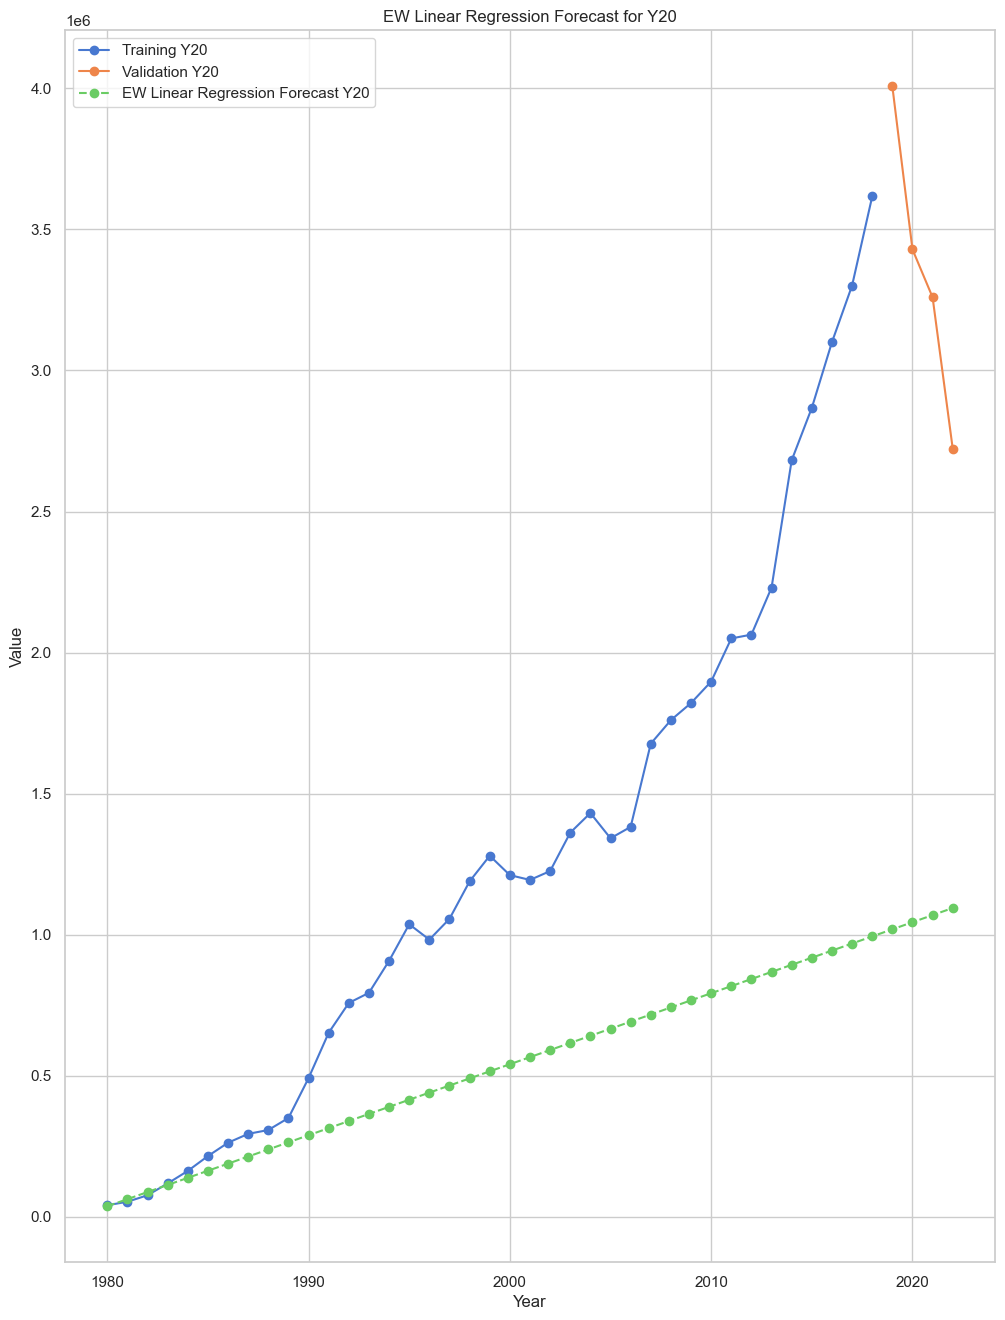

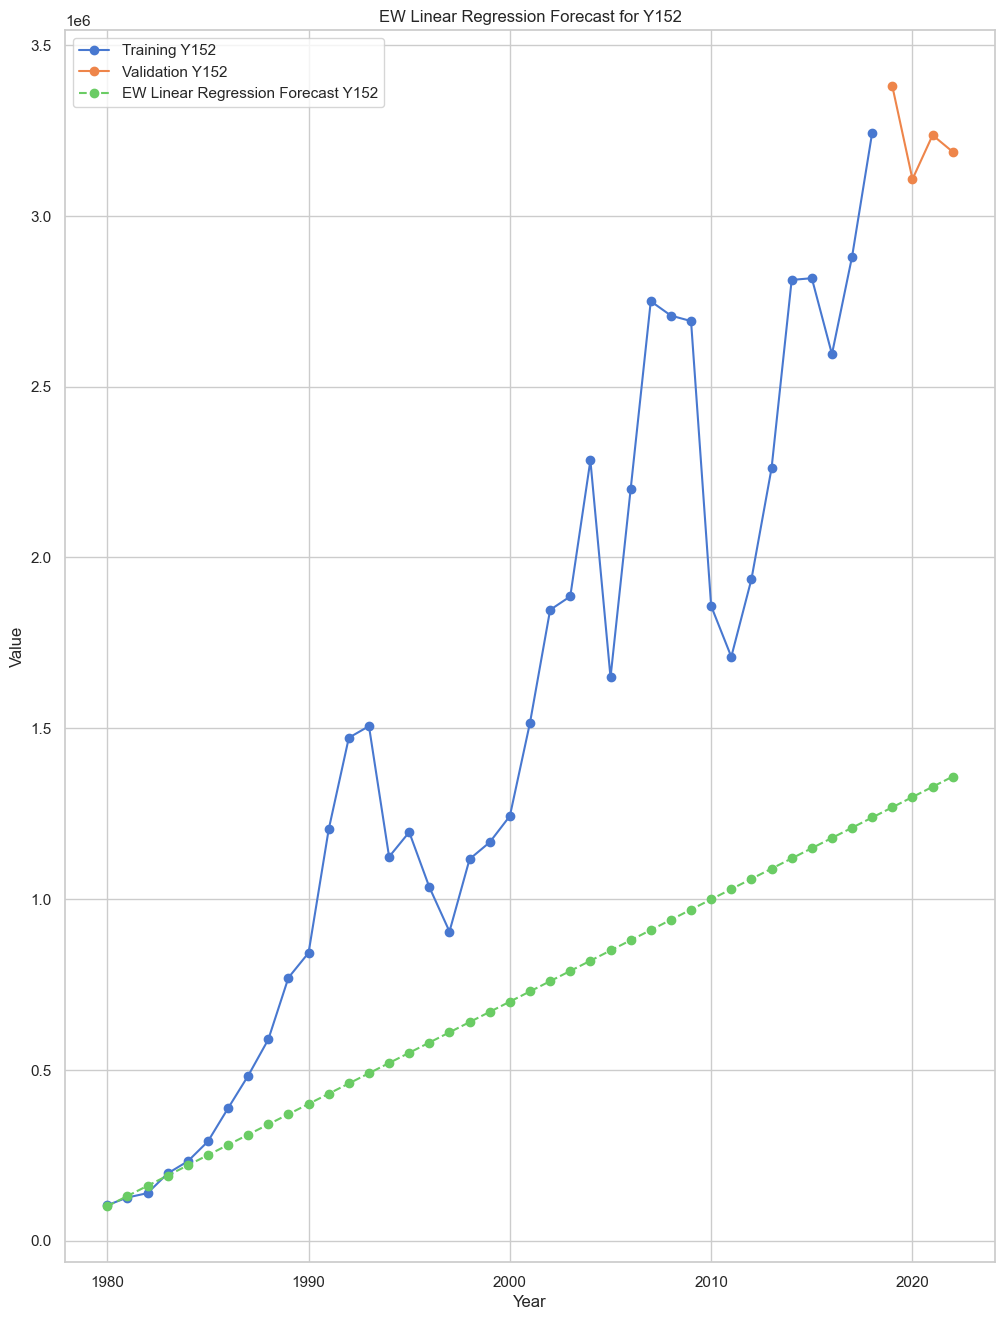

In [38]:
# plot the ew linear regression forecast
x = np.linspace(1980, 2022, 43)
plt.figure(figsize=(12, 16))
plt.plot(train_data['Year'], train_data['Y20'], label='Training Y20',marker='o')
plt.plot(validation_data['Year'], validation_data['Y20'], label='Validation Y20',marker='o')
plt.plot(x, ew_linear_model_Y20.predict(x.reshape(-1, 1)), linestyle='dashed', label='EW Linear Regression Forecast Y20',marker='o')
plt.title('EW Linear Regression Forecast for Y20')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

plt.figure(figsize=(12, 16))
plt.plot(train_data['Year'], train_data['Y152'], label='Training Y152',marker='o')
plt.plot(validation_data['Year'], validation_data['Y152'], label='Validation Y152',marker='o')
plt.plot(x, ew_linear_model_Y152.predict(x.reshape(-1, 1)), linestyle='dashed', label='EW Linear Regression Forecast Y152',marker='o')
plt.title('EW Linear Regression Forecast for Y152')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()


In [72]:
# Ensembling the three methods Naive + Linear + Polynomial
ensemble_predictions_Y20 = (naive_forecast_with_trend(validation_data["Y20"], 0.06, 1) +
                            linear_predictions_Y20 + polynomial_predictions_Y20) / 3

ensemble_predictions_Y152 = (naive_forecast_with_trend(validation_data['Y152'], 0.06, 1) +
                             linear_predictions_Y152 + polynomial_predictions_Y152) / 3

# Compute forecast errors for the ensemble method
forecast_errors_Y20 = validation_data['Y20'] - ensemble_predictions_Y20
forecast_errors_Y152 = validation_data['Y152'] - ensemble_predictions_Y152
ensemble_error_Y20 = calculate_mape(validation_data["Y20"], ensemble_predictions_Y20)
ensemble_error_Y152 = calculate_mape(validation_data['Y152'], ensemble_predictions_Y152)
mase_error_Y20 = calculate_mase(validation_data["Y20"], ensemble_predictions_Y20, train_data['Y20'])
mase_error_Y152 = calculate_mase(validation_data['Y152'], ensemble_predictions_Y152, train_data['Y152'])

print("\nFor Y20 - Ensemble:")
print('Forecast Errors Y20:', forecast_errors_Y20.values.tolist())
print(f"Ensemble MAPE: {ensemble_error_Y20}")
print(f"Ensemble MASE: {mase_error_Y20}")

print("\nFor Y152 - Ensemble:")
print('Forecast Errors Y152:', forecast_errors_Y152.values.tolist())
print(f"Ensemble MAPE: {ensemble_error_Y152}")
print(f"Ensemble MASE: {mase_error_Y152}")



For Y20 - Ensemble:
Forecast Errors Y20: [528232.6407575211, 78041.56278210878, -109123.93577604694, -534592.834916607]
Ensemble MAPE: 9.609755699033999
Ensemble MASE: 2.942397781653106

For Y152 - Ensemble:
Forecast Errors Y152: [192081.71597039513, -33613.9663843452, 111.60567683726549, -81121.47451271629]
Ensemble MAPE: 2.328456342233224
Ensemble MASE: 0.35197122402525366


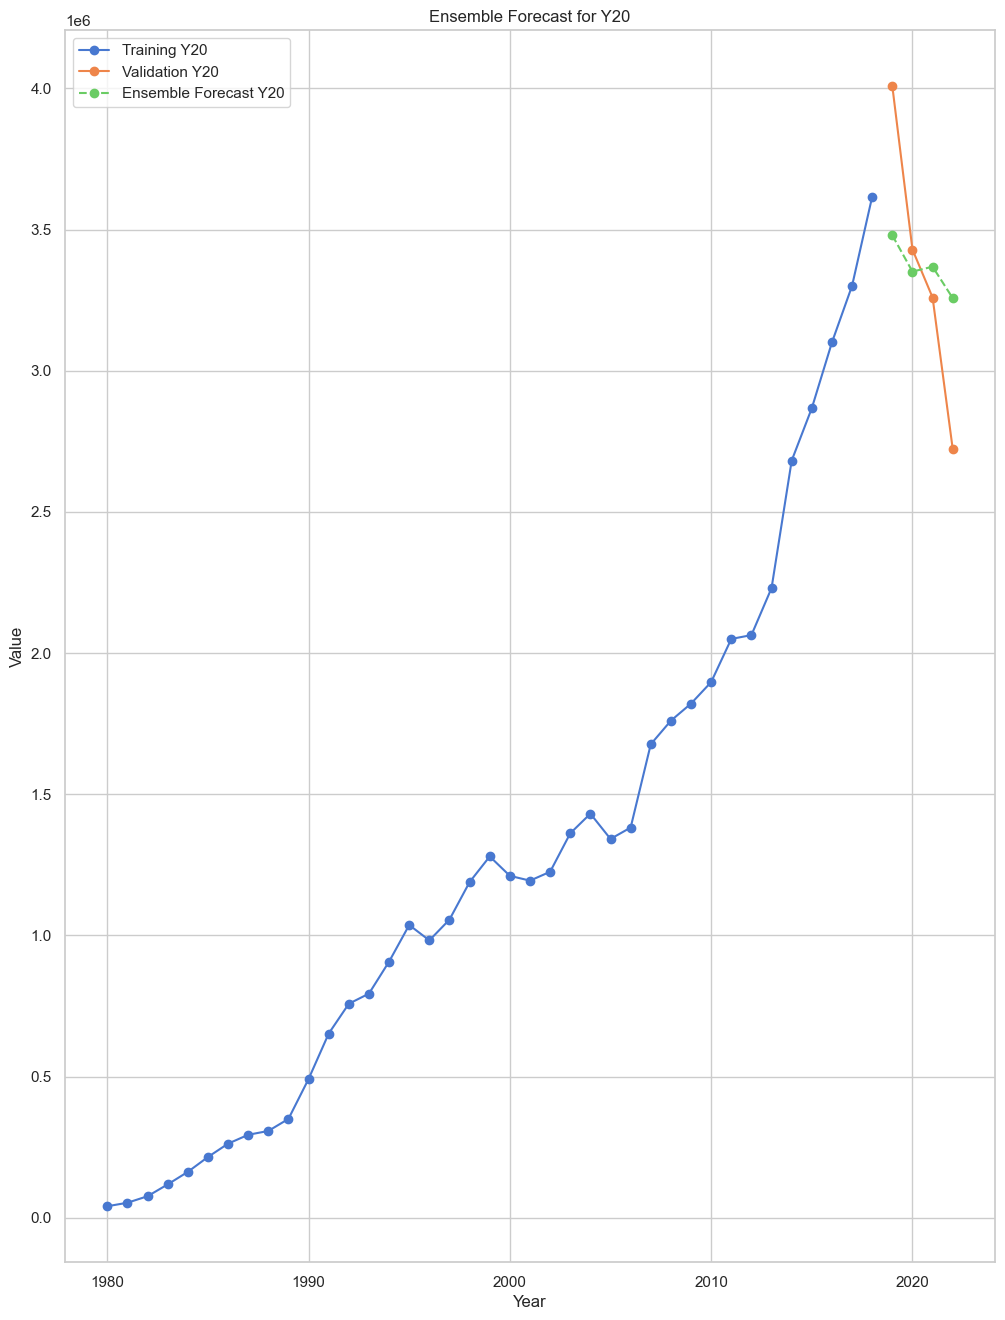

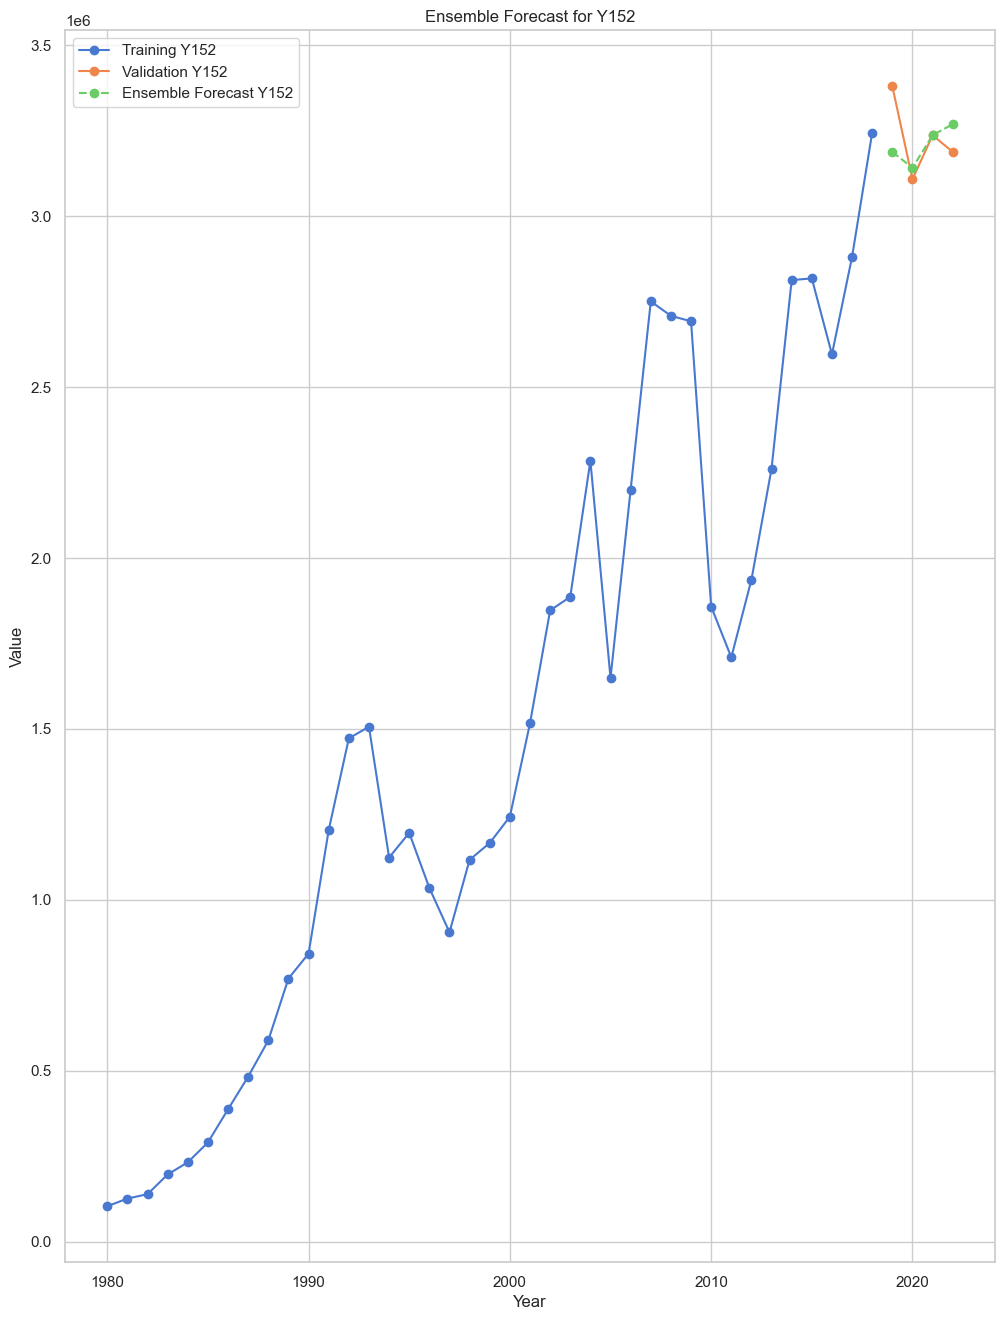

In [76]:
#plot the ensemble forecast
x = np.linspace(1980, 2022, 43)
plt.figure(figsize=(12, 16))
plt.plot(train_data['Year'], train_data['Y20'], label='Training Y20',marker='o')
plt.plot(validation_data['Year'], validation_data['Y20'], label='Validation Y20',marker='o')
plt.plot(validation_data['Year'], ensemble_predictions_Y20, linestyle='dashed', label='Ensemble Forecast Y20',marker='o')
plt.title('Ensemble Forecast for Y20')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

plt.figure(figsize=(12, 16))
plt.plot(train_data['Year'], train_data['Y152'], label='Training Y152',marker='o')
plt.plot(validation_data['Year'], validation_data['Y152'], label='Validation Y152',marker='o')
plt.plot(validation_data['Year'], ensemble_predictions_Y152, linestyle='dashed', label='Ensemble Forecast Y152',marker='o')
plt.title('Ensemble Forecast for Y152')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()


In [77]:
# Ensembling the three methods Naive + EW Linear + Polynomial
ensemble_predictions_Y20 = (naive_forecast_with_trend(validation_data["Y20"], 0.06, 1) +
                            ew_linear_predictions_Y20 + polynomial_predictions_Y20) / 3

ensemble_predictions_Y152 = (naive_forecast_with_trend(validation_data['Y152'], 0.06, 1) +
                             ew_linear_predictions_Y152 + polynomial_predictions_Y152) / 3

# Compute forecast errors for the ensemble method
forecast_errors_Y20 = validation_data['Y20'] - ensemble_predictions_Y20
forecast_errors_Y152 = validation_data['Y152'] - ensemble_predictions_Y152
ensemble_error_Y20 = calculate_mape(validation_data["Y20"], ensemble_predictions_Y20)
ensemble_error_Y152 = calculate_mape(validation_data['Y152'], ensemble_predictions_Y152)
mase_error_Y20 = calculate_mase(validation_data["Y20"], ensemble_predictions_Y20, train_data['Y20'])
mase_error_Y152 = calculate_mase(validation_data['Y152'], ensemble_predictions_Y152, train_data['Y152'])



print("\nFor Y20 - Ensemble:")
print('Forecast Errors Y20:', forecast_errors_Y20.values.tolist())
print(f"Ensemble MAPE: {ensemble_error_Y20}")
print(f"Ensemble MASE: {mase_error_Y20}")

print("\nFor Y152 - Ensemble:")
print('Forecast Errors Y152:', forecast_errors_Y152.values.tolist())
print(f"Ensemble MAPE: {ensemble_error_Y152}")
print(f"Ensemble MASE: {mase_error_Y152}")


For Y20 - Ensemble:
Forecast Errors Y20: [1144856.034436298, 713043.9839032441, 544257.5127874571, 137167.641089255]
Ensemble MAPE: 17.773760560630645
Ensemble MASE: 5.977406963449435

For Y152 - Ensemble:
Forecast Errors Y152: [768645.969694871, 558250.6213810407, 607276.5274831401, 541343.7813345068]
Ensemble MAPE: 19.11413326872311
Ensemble MASE: 2.838804373132008


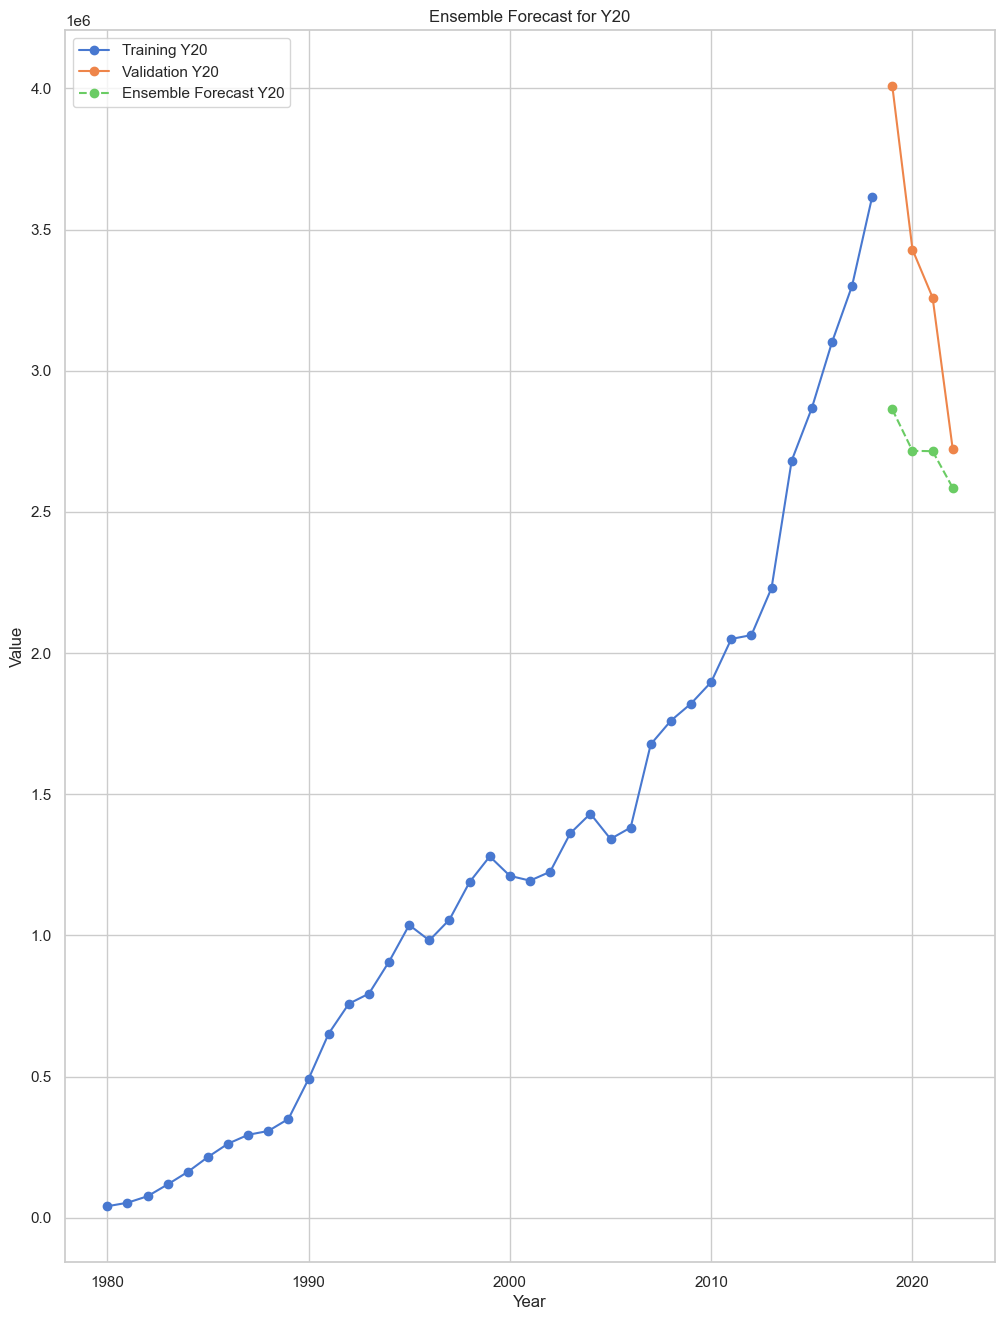

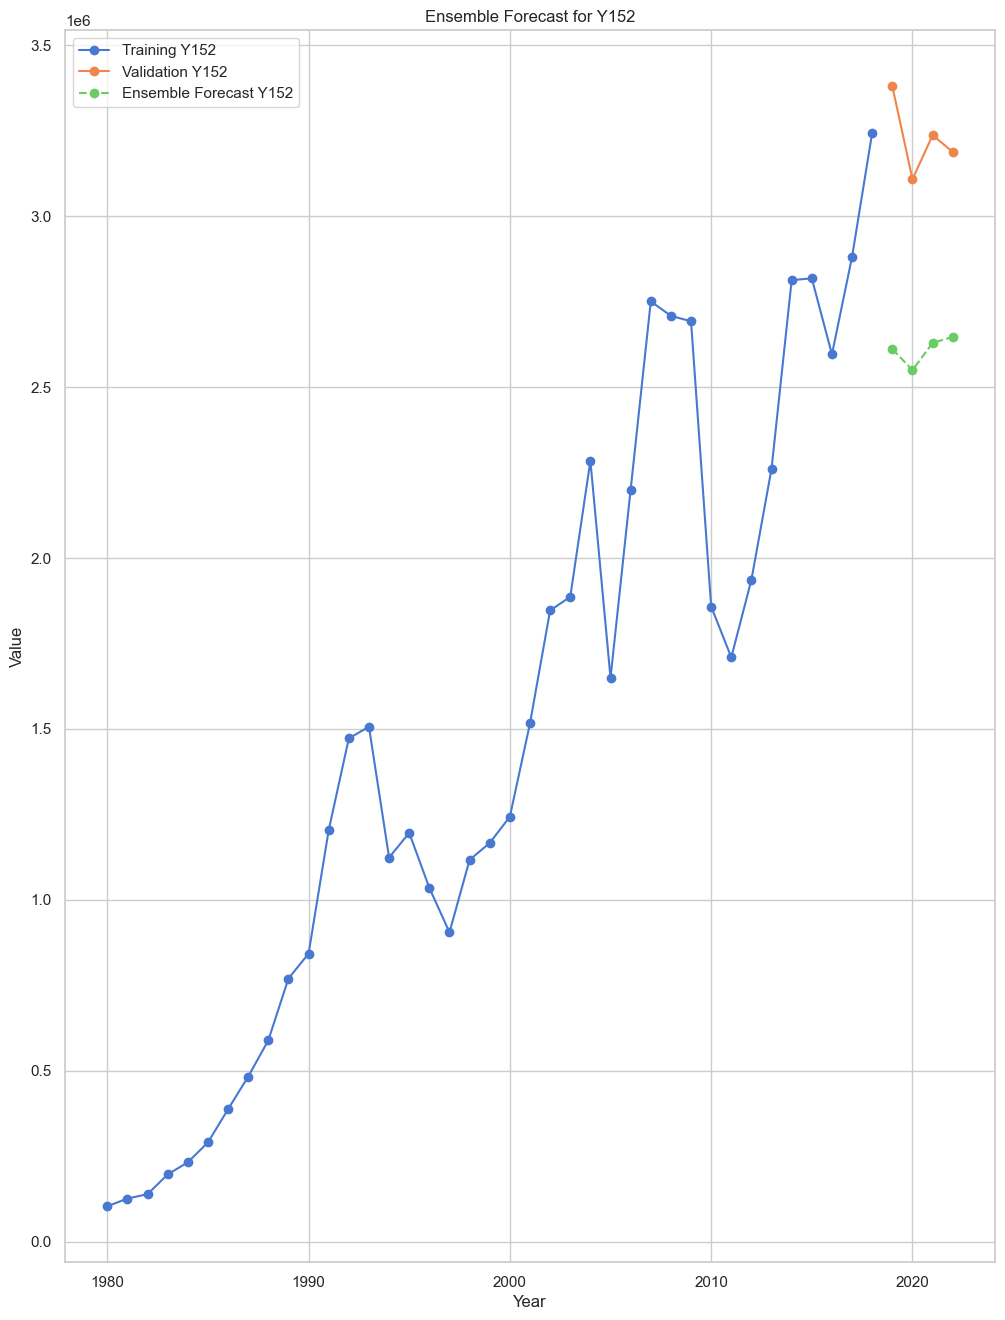

In [78]:
#plot the ensemble forecast
x = np.linspace(1980, 2022, 43)
plt.figure(figsize=(12, 16))
plt.plot(train_data['Year'], train_data['Y20'], label='Training Y20',marker='o')
plt.plot(validation_data['Year'], validation_data['Y20'], label='Validation Y20',marker='o')
plt.plot(validation_data['Year'], ensemble_predictions_Y20, linestyle='dashed', label='Ensemble Forecast Y20',marker='o')
plt.title('Ensemble Forecast for Y20')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

plt.figure(figsize=(12, 16))
plt.plot(train_data['Year'], train_data['Y152'], label='Training Y152',marker='o')
plt.plot(validation_data['Year'], validation_data['Y152'], label='Validation Y152',marker='o')
plt.plot(validation_data['Year'], ensemble_predictions_Y152, linestyle='dashed', label='Ensemble Forecast Y152',marker='o')
plt.title('Ensemble Forecast for Y152')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()


In [41]:
# exponential smoothing

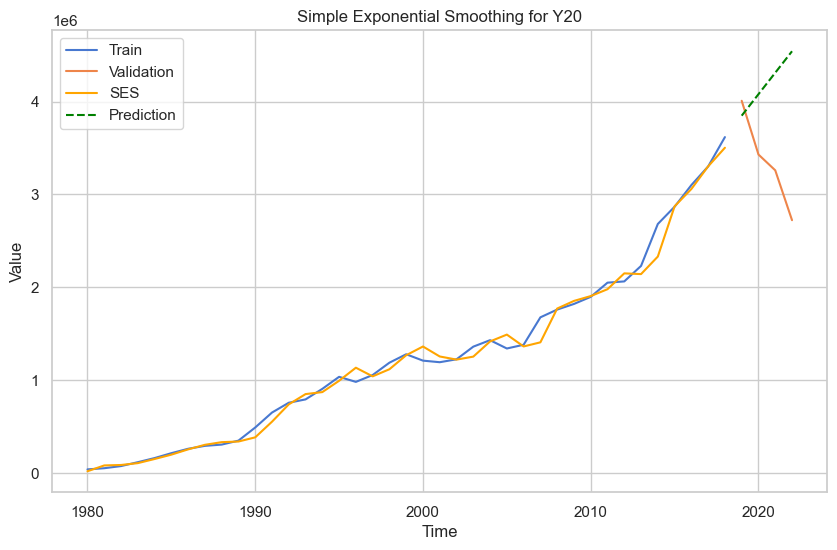

For Y20 - Simple Exponential Smoothing
Forecast Error:[  160264.68642778  -649247.76762603 -1050312.22167984 -1818179.67573365]
MAPE: 30.48365163987265
MASE: 8.657783990252073


In [84]:
Y20_series = pd.Series(train_data['Y20'].values, index=train_data["Year"].values)

Y20_valid = pd.Series(validation_data['Y20'].values, index=validation_data["Year"].values)

# Fit Simple Exponential Smoothing (SES) without seasonality
model_ses_20 = ExponentialSmoothing(Y20_series, trend='add', seasonal=None)
fit_model_ses_20 = model_ses_20.fit()

# Forecast for the next 4 periods
forecast_Y20_ses = fit_model_ses_20.forecast(4)

# Compute forecast error for SES
forecast_Y20_ser = pd.Series(forecast_Y20_ses.values, index=validation_data["Year"].values)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Y20_series, label='Train')
plt.plot(Y20_valid,label='Validation')
plt.plot(fit_model_ses_20.fittedvalues, label='SES', color='orange',)
plt.plot(forecast_Y20_ser, label='Prediction', color='green', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Simple Exponential Smoothing for Y20')
plt.legend()
plt.show()

print("For Y20 - Simple Exponential Smoothing")
print(f"Forecast Error:{Y20_valid.values - forecast_Y20_ser.values}")
print(f"MAPE: {calculate_mape(Y20_valid, forecast_Y20_ser)}")
print(f"MASE: {calculate_mase(Y20_valid, forecast_Y20_ser, Y20_series)}")

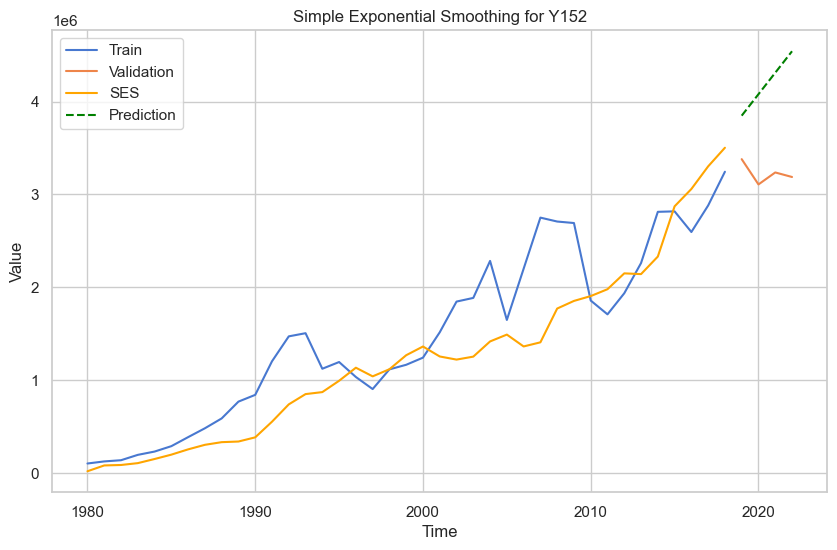

For Y152 Simple Exponential Smoothing
Forecast Error:[ -467900.31357222  -971164.76762603 -1073326.22167984 -1353322.67573365]
MAPE: 30.17988362197267
MASE: 4.433015887806051


In [85]:
# Fit for SES
Y152_series = pd.Series(train_data['Y152'].values, index=train_data["Year"].values)
Y152_valid = pd.Series(validation_data['Y152'].values, index=validation_data["Year"].values)


model_ses = ExponentialSmoothing(Y152_series, trend='add', seasonal=None)
fit_model_ses = model_ses.fit()

# Forecast for the next 4 periods
forecast_Y152_ses = fit_model_ses_20.forecast(4)

# Compute forecast error for SES
forecast_Y152_ser = pd.Series(forecast_Y152_ses.values, index=validation_data["Year"].values)

# Compute forecast error 
forecast_errors_Y152 = Y152_valid - forecast_Y152_ses

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Y152_series, label='Train')
plt.plot(Y152_valid,label='Validation')
plt.plot(fit_model_ses_20.fittedvalues, label='SES', color='orange',)
plt.plot(forecast_Y152_ser, label='Prediction', color='green', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Simple Exponential Smoothing for Y152')
plt.legend()
plt.show()
print("For Y152 Simple Exponential Smoothing")
print(f"Forecast Error:{Y152_valid.values - forecast_Y152_ser.values}")
print(f"MAPE: {calculate_mape(Y152_valid, forecast_Y152_ser)}")
print(f"MASE: {calculate_mase(Y152_valid, forecast_Y152_ser, Y152_series)}")